# Import Data

First date of training dataset:  2010-01-04 00:00:00
Last date of training dataset:  2019-02-08 00:00:00
len of training dataset:  2291

First date of validation dataset:  2019-02-11 00:00:00
Last date of validation dataset:  2021-09-14 00:00:00
len of validation dataset:  654

First date of test dataset:  2021-09-15 00:00:00
Last date of test dataset:  2022-12-30 00:00:00
len of test dataset:  327

total dataset lenght:  3272
sum of the three datasets:  3272
original returns dataframe dimension: (3272, 9)


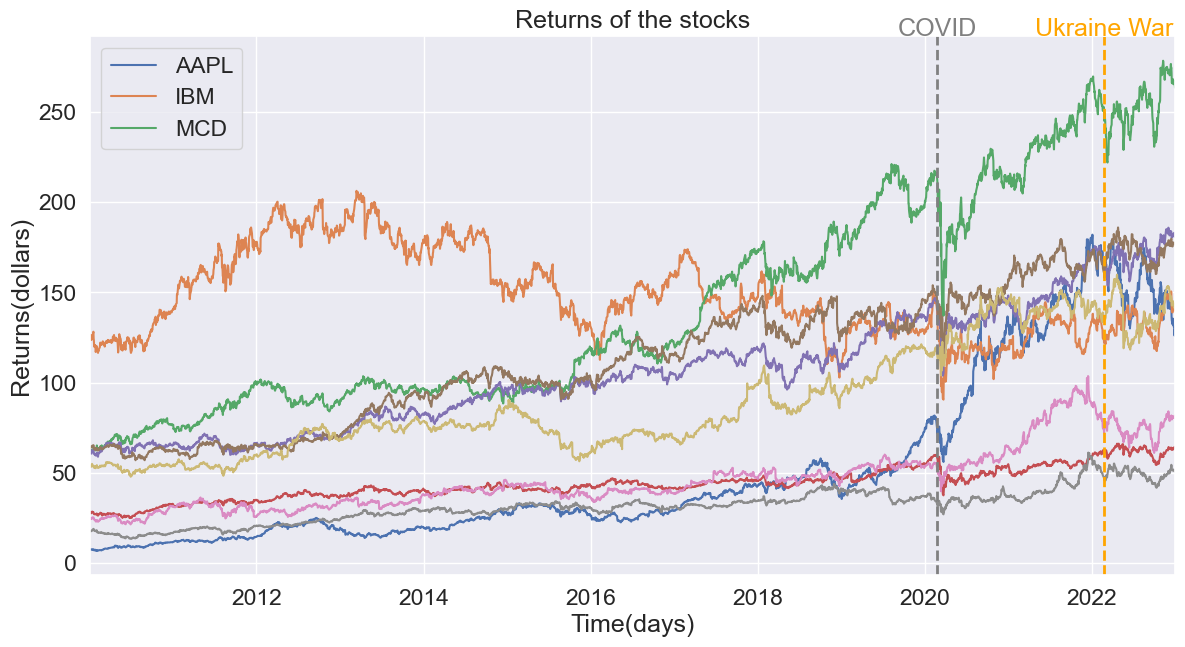

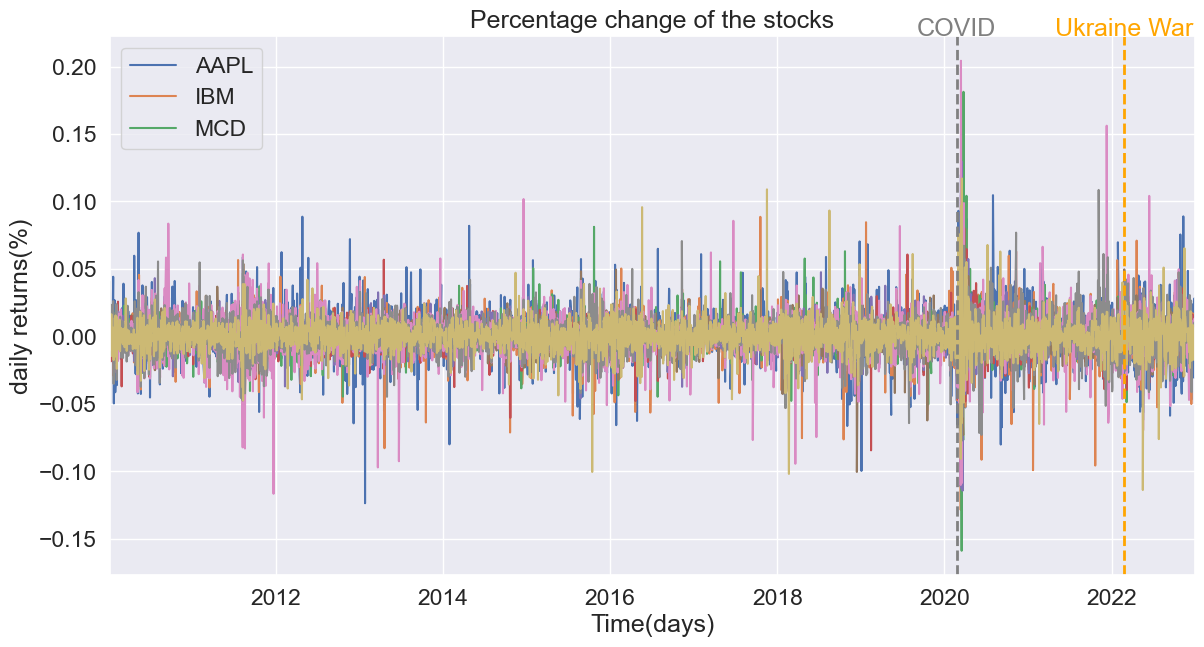

In [1]:
from cvx.covariance.ewma import iterated_ewma, _ewma_cov, _ewma_mean
from cvx.covariance.combination import from_sigmas

from predictorStarter import * # this file contains the import of every dataset, libraries needed and the initial plotting of the data
from predictorsImplementation import * # this file contains the implementation of the predictors ( one function implementation for each predictor)

recover the list of volatilities, log likelihood, regret ecc

In [2]:
# these are all dictionaries that contain the volatility predictions for each predictor; every dictionaries contains the volatility predcitions for each stock(AAPL,IBM,MCD)

%store -r rw_volatilities
%store -r ewma_volatilities
%store -r mgarch_volatilities
%store -r hybrid_rw_volatilities
%store -r hybrid_ewma_volatilities
%store -r hybrid_mgarch_volatilities
%store -r real_volatilities

# assert that every dictionaries have the same length
assert len(rw_volatilities['AAPL']) == len(ewma_volatilities['AAPL']) == len(mgarch_volatilities['AAPL']) == len(hybrid_rw_volatilities['AAPL']) == len(hybrid_ewma_volatilities['AAPL']) == len(hybrid_mgarch_volatilities['AAPL']) == len(real_volatilities['AAPL'])

print("length of the dictionary is: ", rw_volatilities)

# assert that the keys of the dictionaries are the same
assert rw_volatilities.keys() == ewma_volatilities.keys() == mgarch_volatilities.keys() == hybrid_rw_volatilities.keys() == hybrid_ewma_volatilities.keys() == hybrid_mgarch_volatilities.keys() == real_volatilities.keys()

print("keys of the dictionary are: ", rw_volatilities.keys())

# assert that every key of the dictionary has 308 elements
for key in rw_volatilities.keys():
    assert len(rw_volatilities[key]) == len(ewma_volatilities[key]) == len(mgarch_volatilities[key]) == len(hybrid_rw_volatilities[key]) == len(hybrid_ewma_volatilities[key]) == len(hybrid_mgarch_volatilities[key]) == len(real_volatilities[key])

print("shape of the dictionary is: ", len(rw_volatilities['AAPL']))

# assert that every key of every dictionary starts with the same timestamp
for key in rw_volatilities.keys():
    assert next(iter(rw_volatilities[key])) == next(iter(ewma_volatilities[key])) == next(iter(mgarch_volatilities[key])) == next(iter(hybrid_rw_volatilities[key])) == next(iter(hybrid_ewma_volatilities[key])) == next(iter(hybrid_mgarch_volatilities[key])) == next(iter(real_volatilities[key]))

# print the timestamp of the first element of every dictionary
first_timestamp = next(iter(rw_volatilities['AAPL']))

print("timestamp of the first element of the dictionary is: ", first_timestamp)

# save the start date of the predictions
start_date = first_timestamp
end_date = list(rw_volatilities['AAPL'].keys())[-1]

print("start date of the predictions is: ", start_date)
print("end date of the predictions is: ", end_date)


# TODO: HERE IMPORT ALSO THE REGRET, RMSE AND LOGLIKELIHOOD OF THE PREDICTORS

length of the dictionary is:  {'AAPL': {Timestamp('2021-10-12 00:00:00'): 0.012158517406485445, Timestamp('2021-10-13 00:00:00'): 0.011913319619805237, Timestamp('2021-10-14 00:00:00'): 0.012391247142202048, Timestamp('2021-10-15 00:00:00'): 0.012226907317129164, Timestamp('2021-10-18 00:00:00'): 0.012210349605150541, Timestamp('2021-10-19 00:00:00'): 0.012333073634306687, Timestamp('2021-10-20 00:00:00'): 0.012119801150428414, Timestamp('2021-10-21 00:00:00'): 0.01190466795301022, Timestamp('2021-10-22 00:00:00'): 0.011738710730769783, Timestamp('2021-10-25 00:00:00'): 0.01154157045206587, Timestamp('2021-10-26 00:00:00'): 0.011383584786026111, Timestamp('2021-10-27 00:00:00'): 0.011218115906871348, Timestamp('2021-10-28 00:00:00'): 0.011872652620304538, Timestamp('2021-10-29 00:00:00'): 0.012104102833823112, Timestamp('2021-11-01 00:00:00'): 0.011967521324699732, Timestamp('2021-11-02 00:00:00'): 0.011859586240908892, Timestamp('2021-11-03 00:00:00'): 0.011808623383621658, Timestamp(

# NOW PLOT MEAN LOGLIKELIHOOD, REGRET AND RMSE

In [3]:
number_of_stocks = np.array([3, 6, 9])

def plot_metric_with_styles_and_colors(metric_data, title, ylabel):
    plt.figure(figsize=(7, 8))
    
    # Define a color scheme for the models
    colors = {
        'RW': 'tab:blue',
        'EWMA': 'tab:orange',
        'MGARCH': 'tab:green',
        # Assign the same color to hybrid versions
        'H_RW': 'tab:blue',
        'H_EWMA': 'tab:orange',
        'H_MGARCH': 'tab:green',
        'PRESCIENT': 'tab:red',

        # assign color to the improvement of the 3 predictors
        'H_RW_BOOST': 'tab:blue',
        'H_EWMA_BOOST': 'tab:orange',
        'H_MGARCH_BOOST': 'tab:green',
    }
    
    for model, values in metric_data.items():
        linestyle = '--' if 'HYBRID' in model else '-'  # Dashed for hybrid, solid for others
        color = colors[model]  # Get the color for the model
        plt.plot(number_of_stocks, values, marker='o', label=model, linestyle=linestyle, color=color)
    
    # Adjust the y-axis scale
    y_values = [value for values in metric_data.values() for value in values if value]  # Ensure non-empty values
    if y_values:  # Check if y_values is not empty
        y_min, y_max = min(y_values), max(y_values)
        y_buffer = (y_max - y_min) * 0.1  # Adding 10% of the range as a buffer
        plt.ylim([y_min - y_buffer, y_max + y_buffer])

    plt.title(title)
    plt.xlabel('Number of Stocks Considered')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


# there is a different function for loglikelihood because for this metric i have to transfrom the data in a relative scale
def plot_histogram_for_logLikelihood(data, title, yLabelTitle, asset_index):
    '''
    plot histogram for the log likelihood of the predictors
    '''

    # Initialize an array to hold the bar positions
    index = []
    gap = 0.4  # Gap between groups
    current_position = 0

    # Ordered list of predictors with standard and hybrid versions grouped
    if len(data) != 7:
        ordered_predictors = ['H_RW_BOOST', 'H_EWMA_BOOST', 'H_MGARCH_BOOST']
        # Calculate positions
        for i in range(len(ordered_predictors)):
            index.append(current_position)
            # Add a smaller gap for pairs and a larger gap between groups
            if i % 3 == 0 and i != 0:  # Adjust gap for every pair after the first
                current_position += gap / 3
            elif i % 3 != 0:  # No gap within a pair
                current_position += gap / 3  # Larger gap between pairs
            current_position += 1
    else:
        ordered_predictors = ['RW', 'H_RW', 'EWMA', 'H_EWMA', 'MGARCH', 'H_MGARCH', 'PRESCIENT']

        # Calculate positions
        for i in range(len(ordered_predictors)):
            index.append(current_position)
            # Add a smaller gap for pairs and a larger gap between groups
            if i % 2 == 0 and i != 0:  # Adjust gap for every pair after the first
                current_position += gap / 3
            elif i % 2 != 0:  # No gap within a pair
                current_position += gap * 3  # Larger gap between pairs
            current_position += 1

    prescient_value = data['PRESCIENT'][asset_index]  # Get the prescient value for the current asset
    values = np.array([(data[p][asset_index] / prescient_value) * 100 for p in ordered_predictors])  # Calculate relative values

    # Generate a colormap
    colors = cm.viridis(np.linspace(0, 1, len(ordered_predictors)))

    # Plotting bars with colors
    for i, (predictor, value) in enumerate(zip(ordered_predictors, values)):
        plt.bar(index[i], value, 0.8, color=colors[i], label=predictor)

    # Labeling
    plt.xlabel('Predictor')
    plt.ylabel(yLabelTitle)
    plt.title(title)
    plt.xticks(index, ordered_predictors, rotation=45, ha="right")
   # Set y-ticks to include 0, 20, 40, 60, 80, 90, 95, 100
    plt.yticks([0, 20, 40, 60, 80, 90, 95, 100])
    plt.grid(True)
    plt.show()


def plot_histogram(data, title, yLabelTitle, ax, asset_index):
    '''
    Plots a histogram of the data for the given asset index(rmse and regret)
    '''

    # Initialize an array to hold the bar positions
    index = []
    gap = 0.4  # Gap between groups
    current_position = 0

    # Ordered list of predictors with standard and hybrid versions grouped
    if len(data) != 7:
        ordered_predictors = ['H_RW_BOOST', 'H_EWMA_BOOST','H_MGARCH_BOOST']
        # Calculate positions
        for i in range(len(ordered_predictors)):
            index.append(current_position)
            # Add a smaller gap for pairs and a larger gap between groups
            if i % 3 == 0 and i != 0:  # Adjust gap for every pair after the first
                current_position += gap / 3  
            elif i % 3 != 0:  # No gap within a pair
                current_position += gap / 3  # Larger gap between pairs
            current_position += 1
    else:
        ordered_predictors = ['RW', 'H_RW', 'EWMA', 'H_EWMA', 'MGARCH', 'H_MGARCH', 'PRESCIENT']

        # Calculate positions
        for i in range(len(ordered_predictors)):
            index.append(current_position)
            # Add a smaller gap for pairs and a larger gap between groups
            if i % 2 == 0 and i != 0:  # Adjust gap for every pair after the first
                current_position += gap / 3  
            elif i % 2 != 0:  # No gap within a pair
                current_position += gap * 3  # Larger gap between pairs
            current_position += 1
        
    values = np.array([data[p][asset_index] for p in ordered_predictors])

    # Generate a colormap
    colors = cm.viridis(np.linspace(0, 1, len(ordered_predictors)))

    # Plotting bars with colors
    for i, (predictor, value) in enumerate(zip(ordered_predictors, values)):
        ax.bar(index[i], value, 0.8, color=colors[i], label=predictor)

    # Labeling
    ax.set_xlabel('Predictor')
    ax.set_ylabel(yLabelTitle)
    ax.set_title(title)
    ax.set_xticks(index)
    ax.set_xticklabels(ordered_predictors, rotation=45, ha="right")

    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

In [4]:
# Mean Loglikelihood
mean_loglikelihood = {
    'RW': [8.1, 17.8, 25.6],
    'EWMA': [8.2, 18.2, 25.6],
    'MGARCH': [8.3, 18.5, 26.3],

    'H_RW': [8.2, 18.2, 25.4],
    'H_EWMA': [8.1, 18.1, 24.9],
    'H_MGARCH': [8.2, 18.4, 26],

    'PRESCIENT': [8.5, 19, 27.7]
}

# Mean Regret
mean_regret = {
    'RW': [0.4, 1.2, 2.1],
    'EWMA': [0.3, 0.8, 2],
    'MGARCH': [0.2, 0.5, 1.4],

    'H_RW': [0.3, 0.8, 2.2],
    'H_EWMA': [0.4, 0.9, 2.7],
    'H_MGARCH': [0.3, 0.7, 1.6],

    'PRESCIENT': [0, 0, 0]
}

# Mean RMSE
mean_rmse = {
    'RW': [0.0135287164, 0.0162867959, 0.0232394294],
    'EWMA': [0.0138895248, 0.0157856632, 0.0221445214],
    'MGARCH': [0.0156442254, 0.0183768807, 0.0247100441],

    'H_RW': [0.0128988004, 0.0152217991, 0.0211461890],
    'H_EWMA': [0.0136928594, 0.0156146511, 0.0218686480],
    'H_MGARCH': [0.0141520314, 0.0162460398, 0.0212515323],

    'PRESCIENT': [0, 0, 0]
}

mean_rmse_aapl = {
    'RW': [0.0539805028, 0.0539805028, 0.0578822574],
    'EWMA': [0.0531991990, 0.0529664956, 0.0544669223],
    'MGARCH': [0.0596408184, 0.0596408184, 0.0623984393],

    'H_RW': [0.0504861720, 0.0506036995, 0.0510106291],
    'H_EWMA': [0.0517947991, 0.0511277154, 0.0514198542],
    'H_MGARCH': [0.0540459134, 0.0527201072, 0.0540459134],

    'PRESCIENT': [0, 0, 0]
}

mean_rmse_ibm = {
    'RW': [0.0437351620, 0.0437351620, 0.0418755089],
    'EWMA': [0.0489590973, 0.0418430859, 0.0414620533],
    'MGARCH': [0.0576851266, 0.0576851266, 0.0581152686],

    'H_RW': [0.0404968352, 0.0392656764, 0.0392719313],
    'H_EWMA': [0.0478980939, 0.0430765728, 0.0461840075],
    'H_MGARCH': [0.0476287461, 0.0472085361, 0.0476287461],

    'PRESCIENT': [0, 0, 0]
}

mean_rmse_mcd = {
    'RW': [0.0382106989, 0.0382106989, 0.0417970565],
    'EWMA': [0.0417817856, 0.0378718613, 0.0378578004],
    'MGARCH': [0.0387113510, 0.0387066228, 0.0508791782],

    'H_RW': [0.0407815042, 0.0402700938, 0.0403842451],
    'H_EWMA': [0.0407699968, 0.0394935742, 0.0400972485],
    'H_MGARCH': [0.0430782617, 0.0375250899, 0.0430782617],
    
    'PRESCIENT': [0, 0, 0]
}

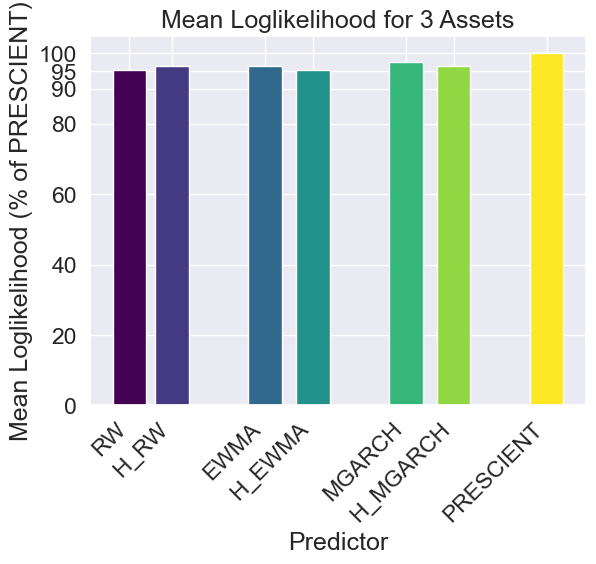

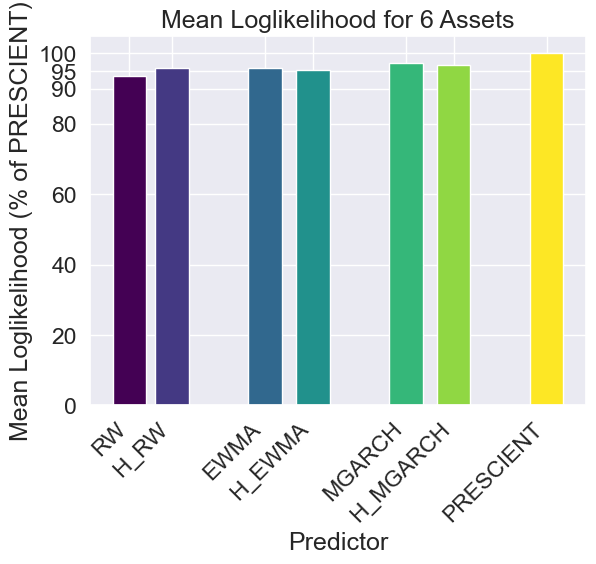

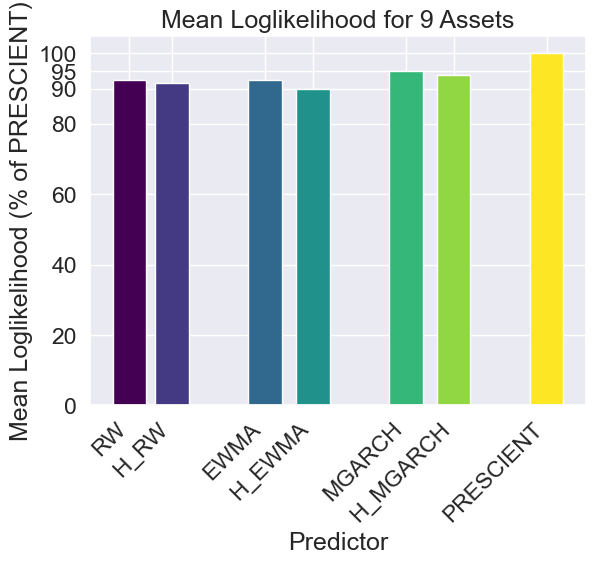

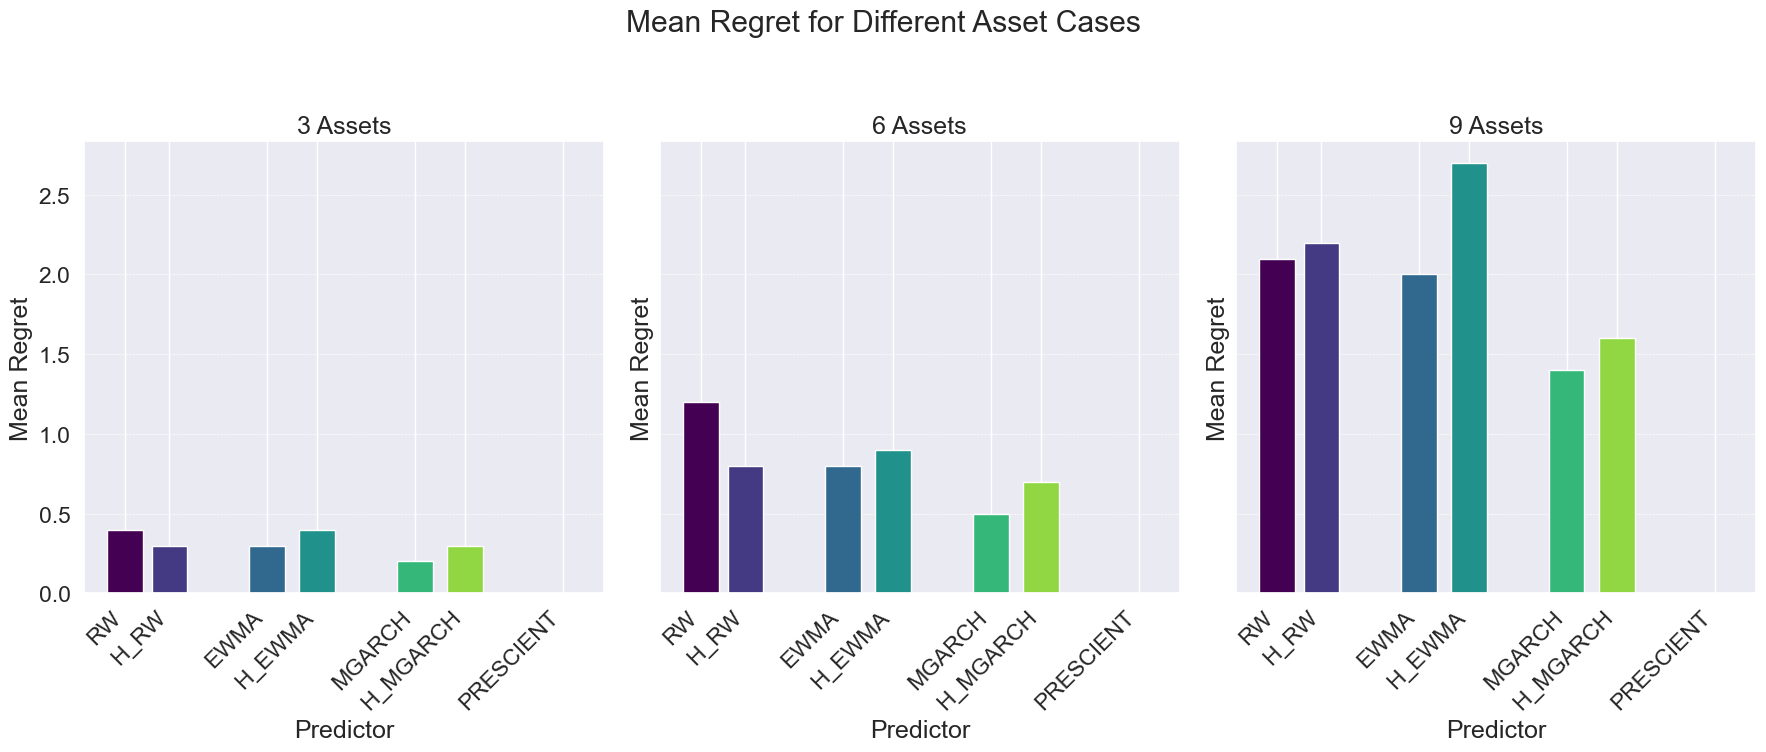

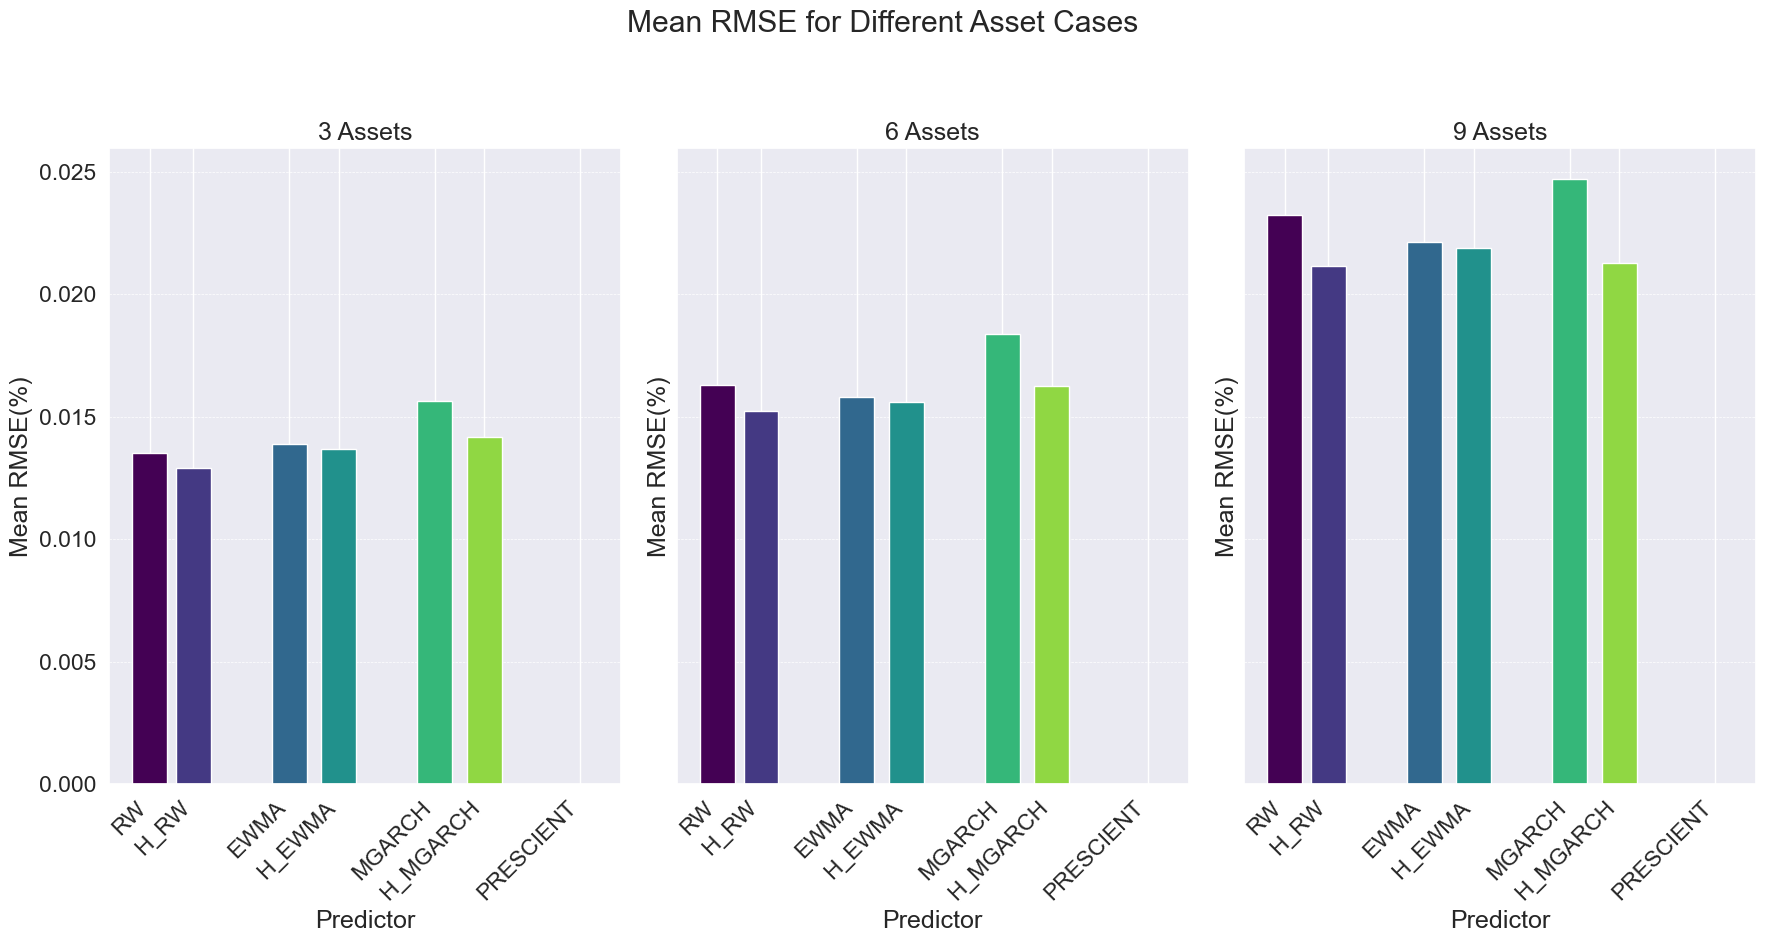

In [5]:
# Now create individual histograms for mean loglikelihood
for i, asset_count in enumerate(number_of_stocks):
    asset_title = f'{asset_count} Assets'
    plot_histogram_for_logLikelihood(mean_loglikelihood, f'Mean Loglikelihood for {asset_title}', 'Mean Loglikelihood (% of PRESCIENT)', i)


# Creating figure and axes for plotting regret
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
fig.suptitle('Mean Regret for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_regret, '3 Assets', 'Mean Regret', axs[0], 0)
plot_histogram(mean_regret, '6 Assets', 'Mean Regret', axs[1], 1)
plot_histogram(mean_regret, '9 Assets', 'Mean Regret', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting RMSE
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse, '3 Assets', 'Mean RMSE(%)', axs[0], 0)
plot_histogram(mean_rmse, '6 Assets', 'Mean RMSE(%)', axs[1], 1)
plot_histogram(mean_rmse, '9 Assets', 'Mean RMSE(%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Now we want to have a fair comparison, so i measure the rmse between the real and the predicted volatility of apple, ibm and mcd in the case of 3, 6 and 9 assets. then i plot 3 charts with the rmse performance.

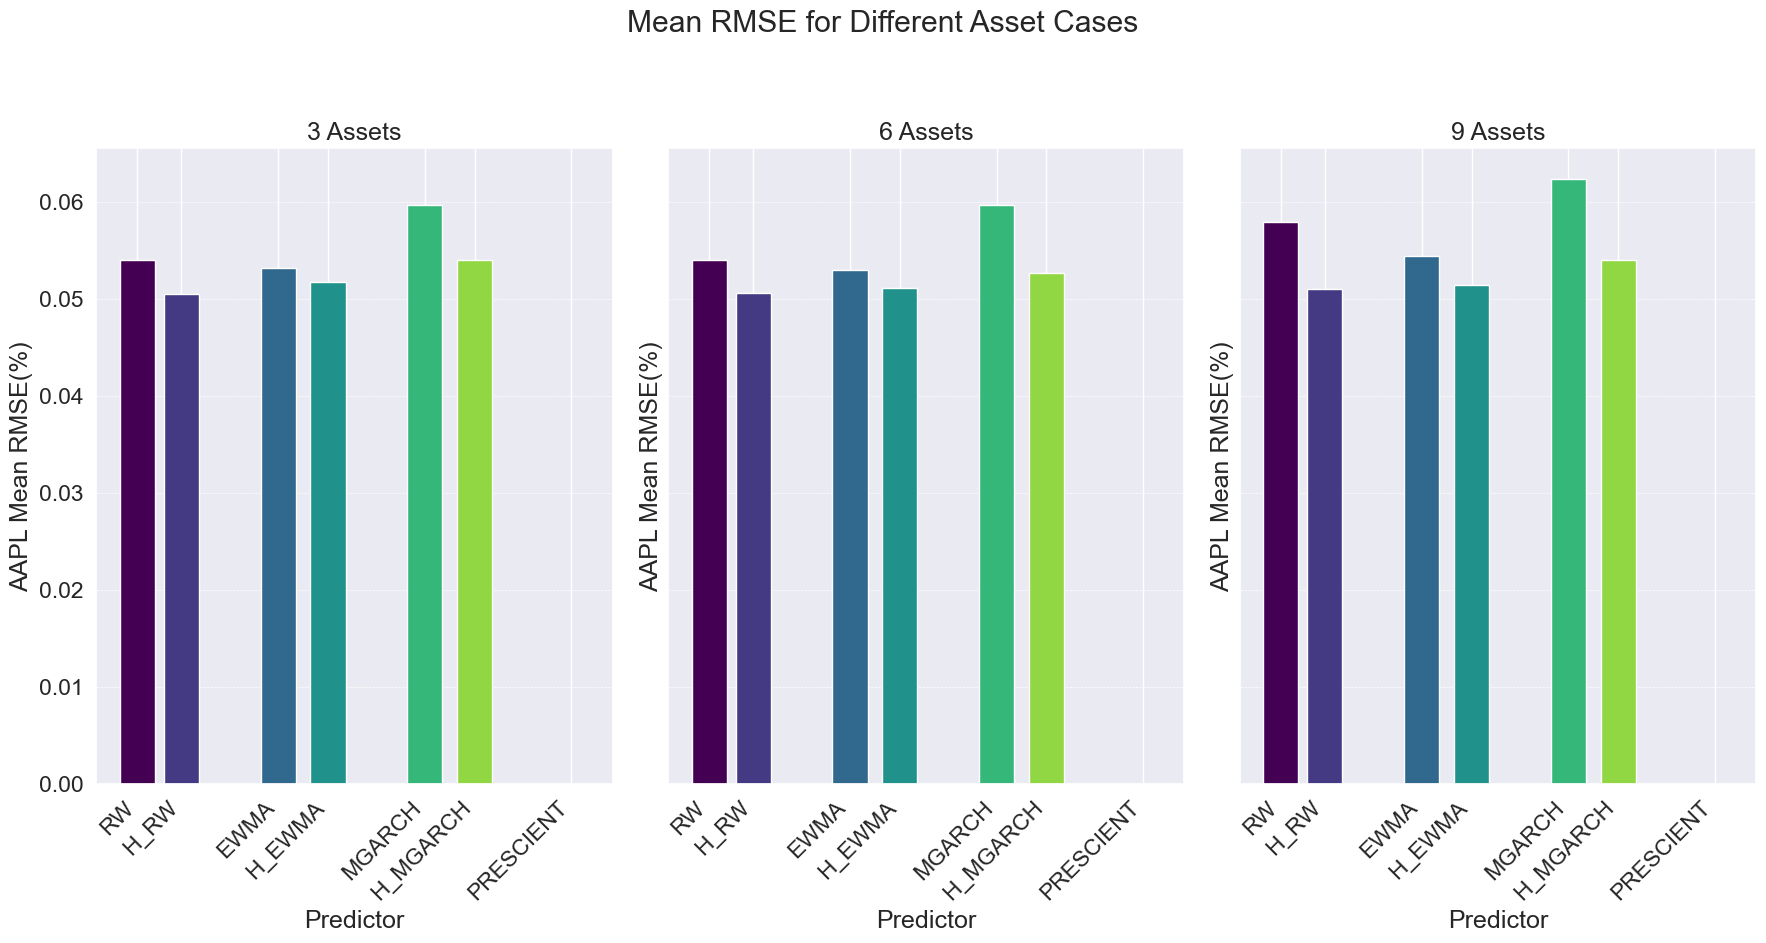

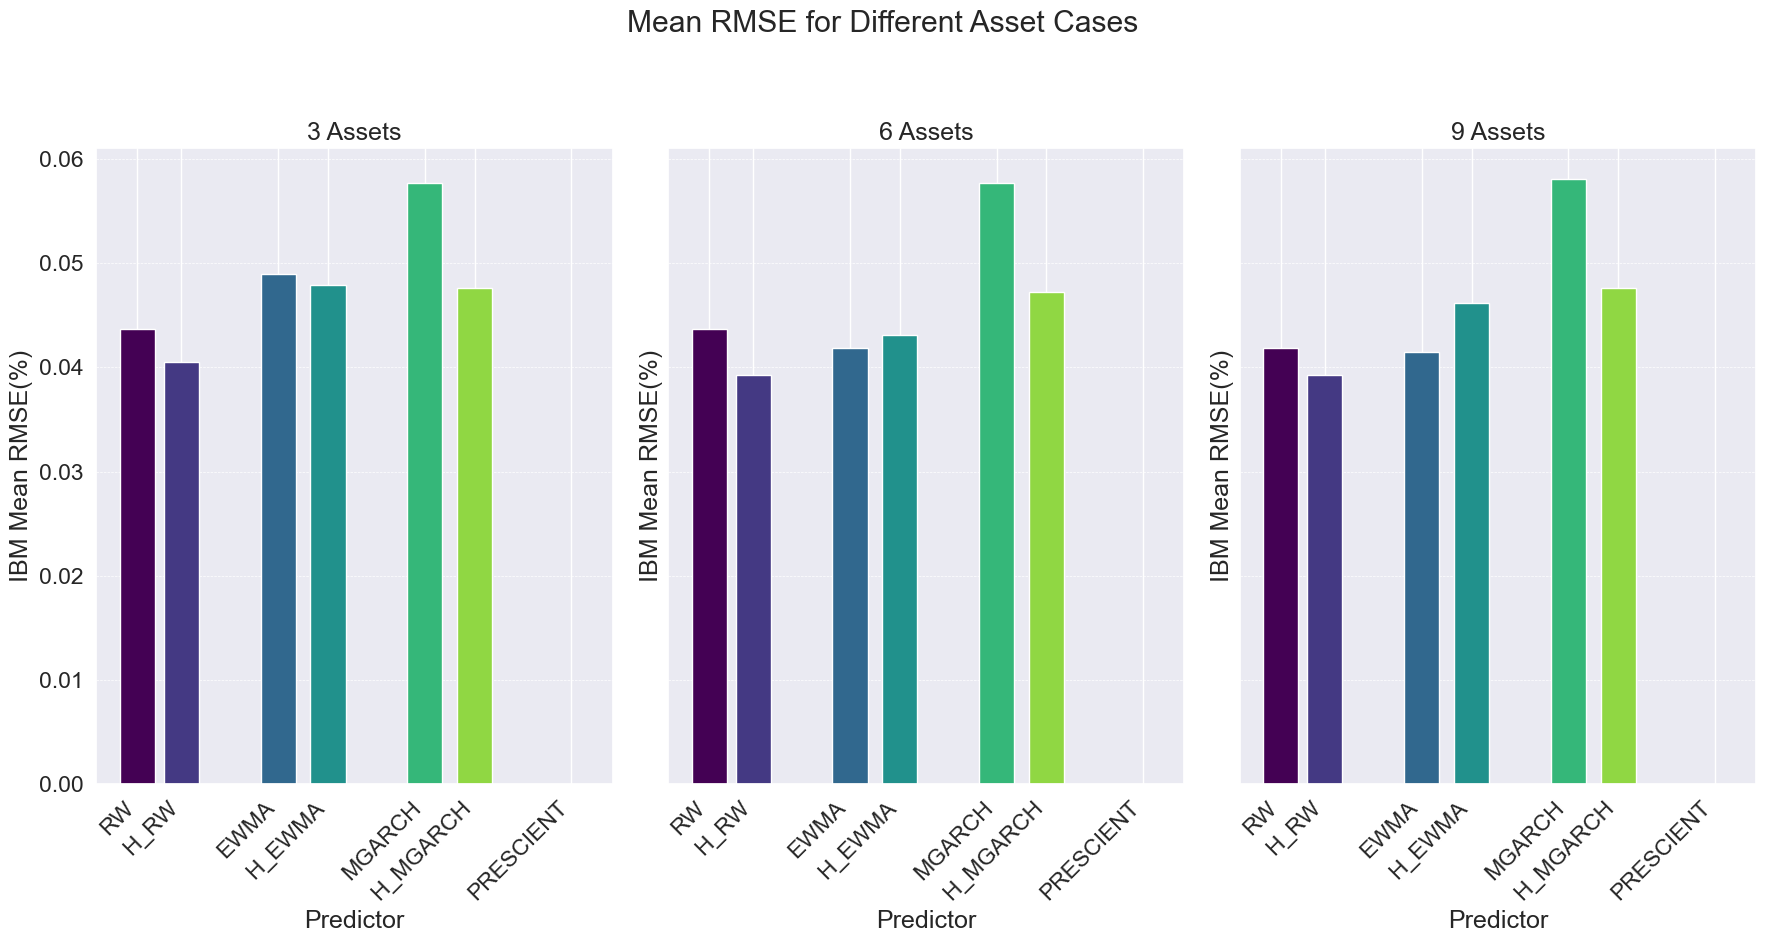

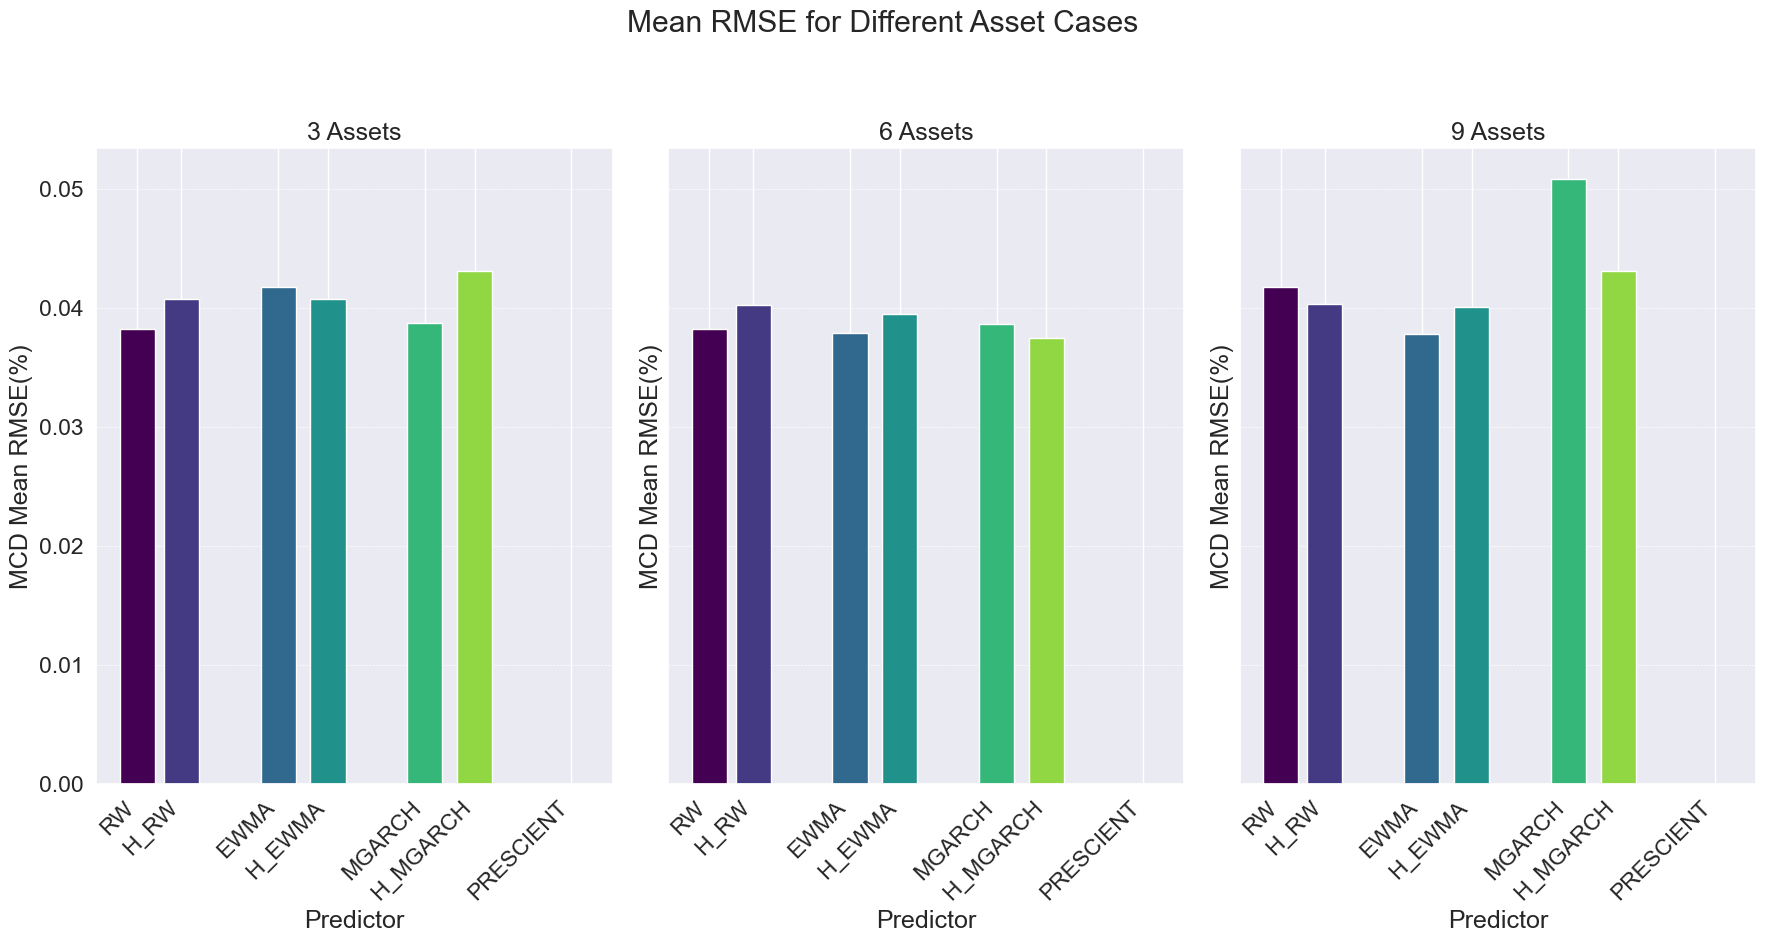

In [6]:
# Plotting the improved charts for Mean Loglikelihood, Mean Regret, and Mean RMSE
#plot_metric_with_styles_and_colors(mean_rmse_aapl, 'Mean RMSE for Different Predictors', 'AAPL Mean RMSE (in percentage points)')
#plot_metric_with_styles_and_colors(mean_rmse_ibm, 'Mean RMSE for Different Predictors', 'IBM Mean RMSE (in percentage points)')
#plot_metric_with_styles_and_colors(mean_rmse_mcd, 'Mean RMSE for Different Predictors', 'MCD Mean RMSE (in percentage points)')

# Creating figure and axes for plotting Mean rmse aapl
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse_aapl, '3 Assets', 'AAPL Mean RMSE(%)', axs[0], 0)
plot_histogram(mean_rmse_aapl, '6 Assets', 'AAPL Mean RMSE(%)', axs[1], 1)
plot_histogram(mean_rmse_aapl, '9 Assets', 'AAPL Mean RMSE(%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting Mean rmse ibm
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse_ibm, '3 Assets', 'IBM Mean RMSE(%)', axs[0], 0)
plot_histogram(mean_rmse_ibm, '6 Assets', 'IBM Mean RMSE(%)', axs[1], 1)
plot_histogram(mean_rmse_ibm, '9 Assets', 'IBM Mean RMSE(%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting Mean rmse mcd
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse_mcd, '3 Assets', 'MCD Mean RMSE(%)', axs[0], 0)
plot_histogram(mean_rmse_mcd, '6 Assets', 'MCD Mean RMSE(%)', axs[1], 1)
plot_histogram(mean_rmse_mcd, '9 Assets', 'MCD Mean RMSE(%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

mean determinants values:  [8.823212302484815e-12, 1.7118638041617437e-24, 1.8710140288409617e-35]
mean matrix product values:  [3.0019700890236787, 5.970959088030189, 8.959471505947539]
mean loglikelihood values:  [8.516550710705427, 19.029652299330674, 27.675720610189646]


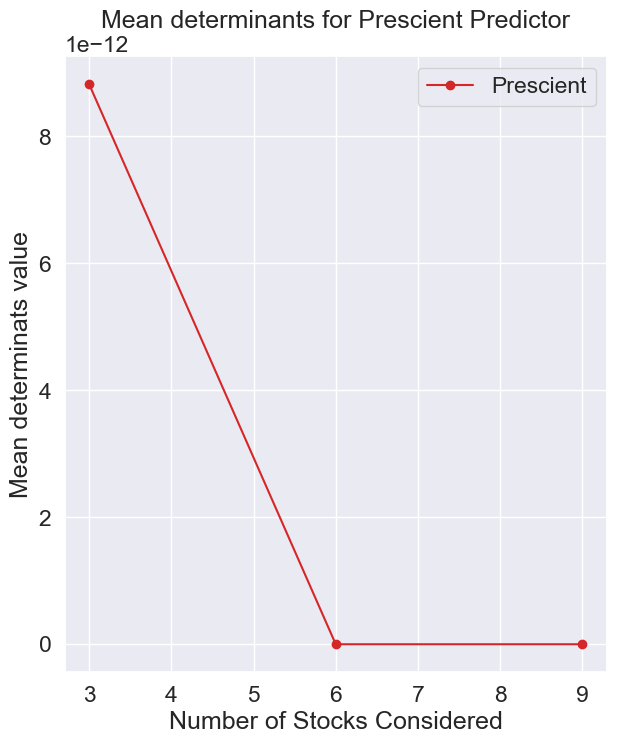

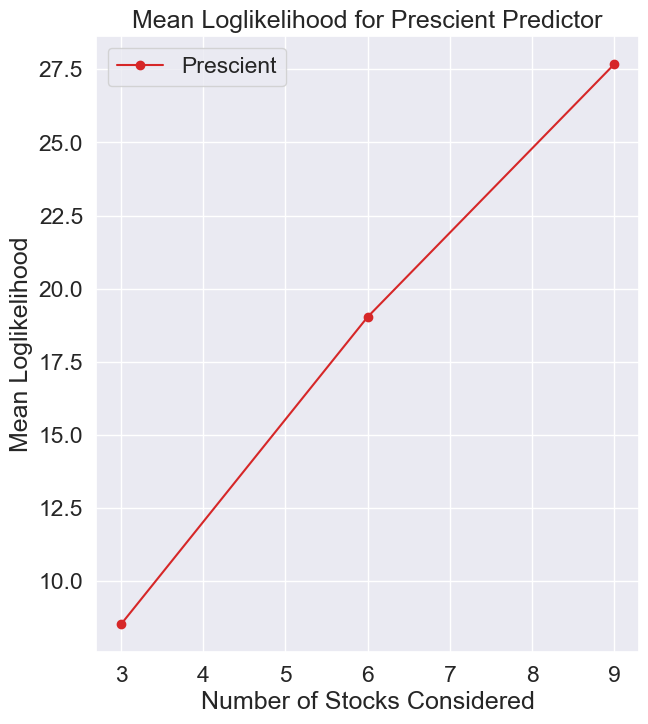

In [7]:
# now we have to get the mean regret and mean loglikelihood value for the prescient predictor in case of 3, 6 and 9 stocks

filePathName = [
    "detsAndMatrixProduct3Assets.csv",
    "detsAndMatrixProduct6Assets.csv",
    "detsAndMatrixProduct9Assets.csv"
]

# mean regret for prescient predictor

# for every file read just the first column, take every value of the first column and sum them up, then divide the sum by the number of rows in the file
mean_determinants_prescient = []
for file in filePathName:
    data = pd.read_csv(file)
    mean_determinants_prescient.append(data.iloc[:, 0].sum() / data.shape[0])

print("mean determinants values: ", mean_determinants_prescient)

# mean matrix product for prescient predictor
mean_matrix_product_prescient = []
for file in filePathName:
    data = pd.read_csv(file)
    mean_matrix_product_prescient.append(data.iloc[:, 1].sum() / data.shape[0])

print("mean matrix product values: ", mean_matrix_product_prescient)

# mean loglikelihood for prescient predictor

# for every file read just the third column, take every value of the third column and sum them up, then divide the sum by the number of rows in the file
mean_loglikelihood_prescient = []
for file in filePathName:
    data = pd.read_csv(file)
    mean_loglikelihood_prescient.append(data.iloc[:, 2].sum() / data.shape[0])

print("mean loglikelihood values: ", mean_loglikelihood_prescient)

# plot the mean regret and mean loglikelihood for the prescient predictor in the case of 3, 6 and 9 stocks
plt.figure(figsize=(7, 8))
plt.plot(number_of_stocks, mean_determinants_prescient, marker='o', label='Prescient', linestyle='-', color='tab:red')
plt.title('Mean determinants for Prescient Predictor')
plt.xlabel('Number of Stocks Considered')
plt.ylabel('Mean determinats value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 8))
plt.plot(number_of_stocks, mean_loglikelihood_prescient, marker='o', label='Prescient', linestyle='-', color='tab:red')
plt.title('Mean Loglikelihood for Prescient Predictor')
plt.xlabel('Number of Stocks Considered')
plt.ylabel('Mean Loglikelihood')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# now here i want to calculate the improvement or the worsening of the hybrid predictors compared to the base predictors, for the mean regret, mean loglikelihood and mean rmse
# calculate the percentage difference between the hybrid and the base predictors for the mean regret, mean loglikelihood and mean rmse(it can be positive or negative)

# mean regret improvement
mean_regret_improvement = {
    'RW': [],
    'EWMA': [],
    'MGARCH': []
}

for i in range(3):
    for model in ['RW', 'EWMA', 'MGARCH']:
        mean_regret_improvement[model].append((mean_regret[f'H_{model}'][i] - mean_regret[model][i]) / mean_regret[model][i] * 100)

        # truncate to 2 decimal places
        mean_regret_improvement[model][i] = round(mean_regret_improvement[model][i], 2)

# change the key names: RW -> H_RW_IMPROVEMENT, EWMA -> H_EWMA_IMPROVEMENT, MGARCH -> H_MGARCH_IMPROVEMENT
mean_regret_improvement['H_RW_BOOST'] = mean_regret_improvement.pop('RW')
mean_regret_improvement['H_EWMA_BOOST'] = mean_regret_improvement.pop('EWMA')
mean_regret_improvement['H_MGARCH_BOOST'] = mean_regret_improvement.pop('MGARCH')

print("Mean Regret Improvement: ", mean_regret_improvement)

# mean loglikelihood improvement
mean_loglikelihood_improvement = {
    'RW': [],
    'EWMA': [],
    'MGARCH': []
}

for i in range(3):
    for model in ['RW', 'EWMA', 'MGARCH']:
        mean_loglikelihood_improvement[model].append((mean_loglikelihood[f'H_{model}'][i] - mean_loglikelihood[model][i]) / mean_loglikelihood[model][i] * 100)

        # truncate to 2 decimal places
        mean_loglikelihood_improvement[model][i] = round(mean_loglikelihood_improvement[model][i], 2)

# change the key names: RW -> H_RW_IMPROVEMENT, EWMA -> H_EWMA_IMPROVEMENT, MGARCH -> H_MGARCH_IMPROVEMENT
mean_loglikelihood_improvement['H_RW_BOOST'] = mean_loglikelihood_improvement.pop('RW')
mean_loglikelihood_improvement['H_EWMA_BOOST'] = mean_loglikelihood_improvement.pop('EWMA')
mean_loglikelihood_improvement['H_MGARCH_BOOST'] = mean_loglikelihood_improvement.pop('MGARCH')

print("Mean Loglikelihood Improvement: ", mean_loglikelihood_improvement)

# mean rmse improvement
mean_rmse_improvement = {
    'RW': [],
    'EWMA': [],
    'MGARCH': []
}

for i in range(3):
    for model in ['RW', 'EWMA', 'MGARCH']:
        mean_rmse_improvement[model].append((mean_rmse[f'H_{model}'][i] - mean_rmse[model][i]) / mean_rmse[model][i] * 100)

        # truncate to 2 decimal places
        mean_rmse_improvement[model][i] = round(mean_rmse_improvement[model][i], 2)

# change the key names: RW -> H_RW_IMPROVEMENT, EWMA -> H_EWMA_IMPROVEMENT, MGARCH -> H_MGARCH_IMPROVEMENT
mean_rmse_improvement['H_RW_BOOST'] = mean_rmse_improvement.pop('RW')
mean_rmse_improvement['H_EWMA_BOOST'] = mean_rmse_improvement.pop('EWMA')
mean_rmse_improvement['H_MGARCH_BOOST'] = mean_rmse_improvement.pop('MGARCH')

print("Mean RMSE Improvement: ", mean_rmse_improvement)

Mean Regret Improvement:  {'H_RW_BOOST': [-25.0, -33.33, 4.76], 'H_EWMA_BOOST': [33.33, 12.5, 35.0], 'H_MGARCH_BOOST': [50.0, 40.0, 14.29]}
Mean Loglikelihood Improvement:  {'H_RW_BOOST': [1.23, 2.25, -0.78], 'H_EWMA_BOOST': [-1.22, -0.55, -2.73], 'H_MGARCH_BOOST': [-1.2, -0.54, -1.14]}
Mean RMSE Improvement:  {'H_RW_BOOST': [-4.66, -6.54, -9.01], 'H_EWMA_BOOST': [-1.42, -1.08, -1.25], 'H_MGARCH_BOOST': [-9.54, -11.6, -14.0]}


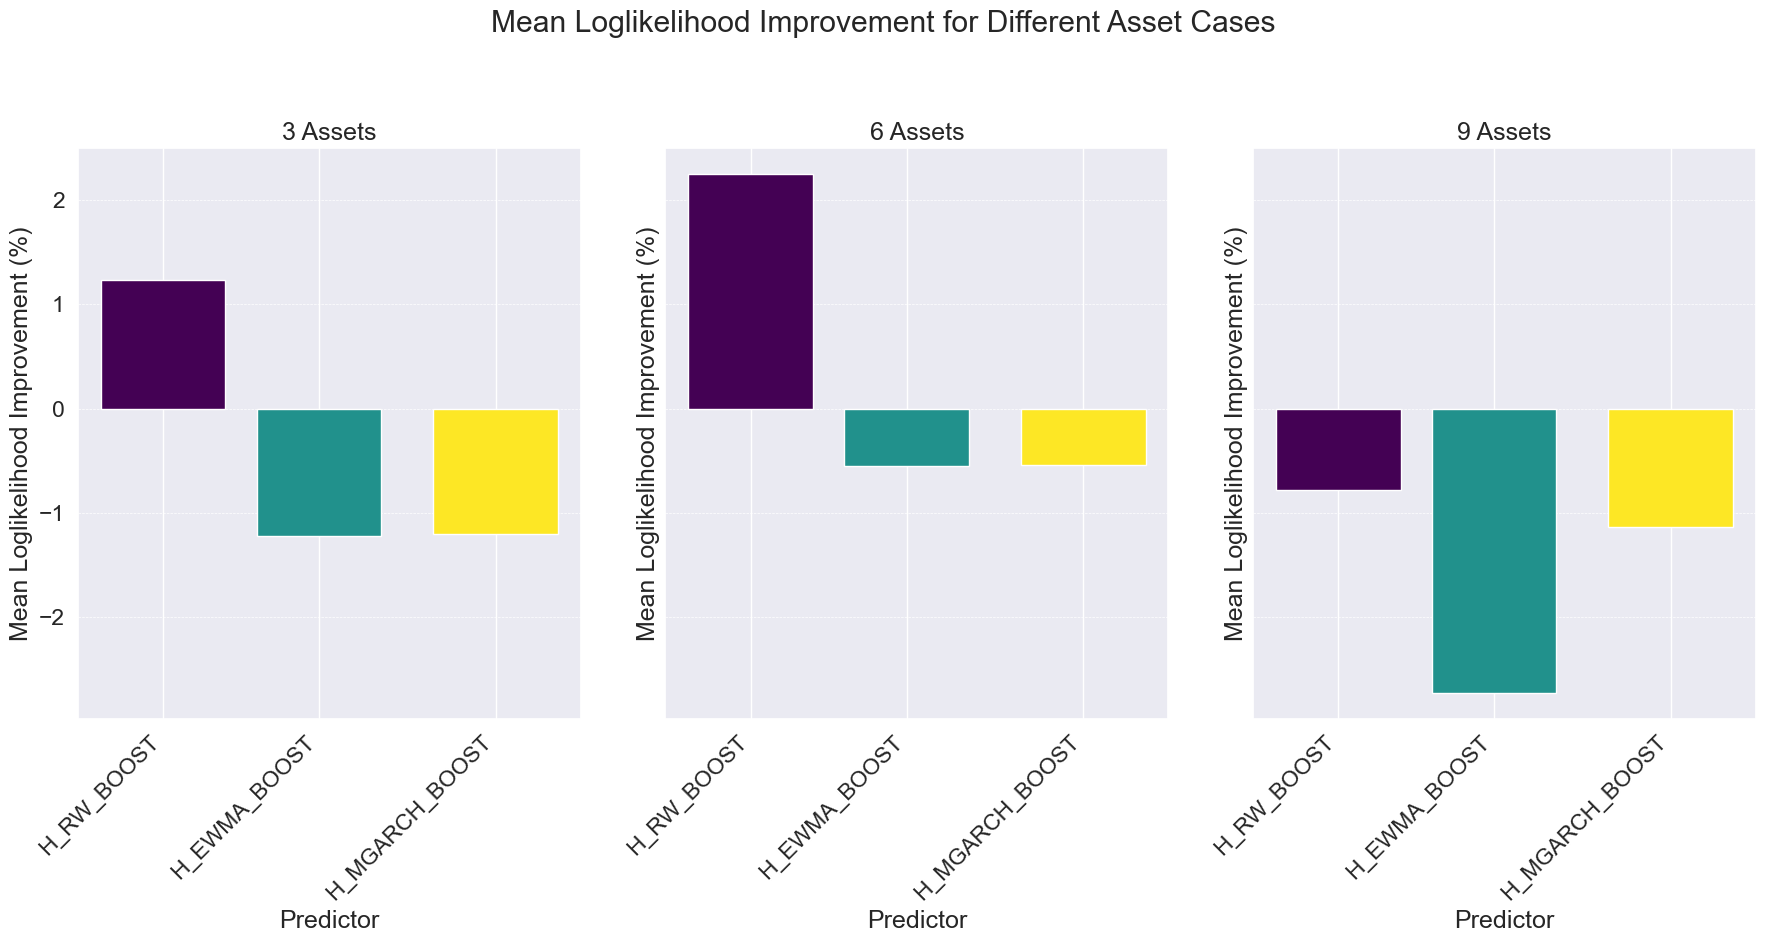

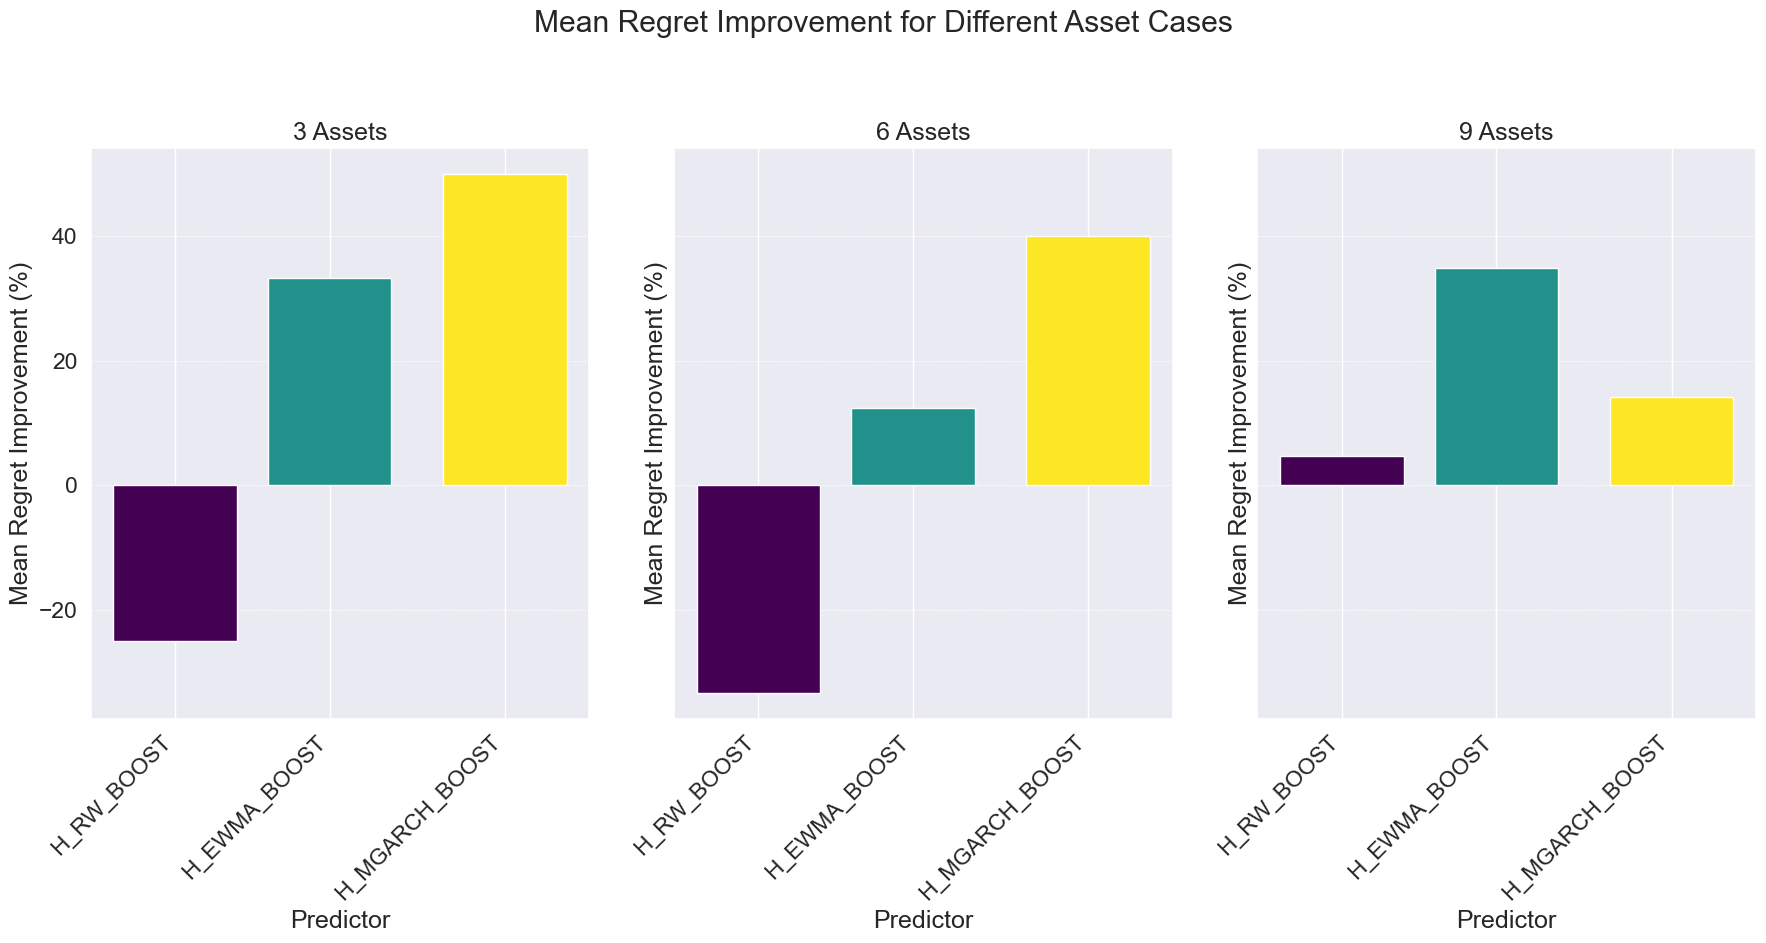

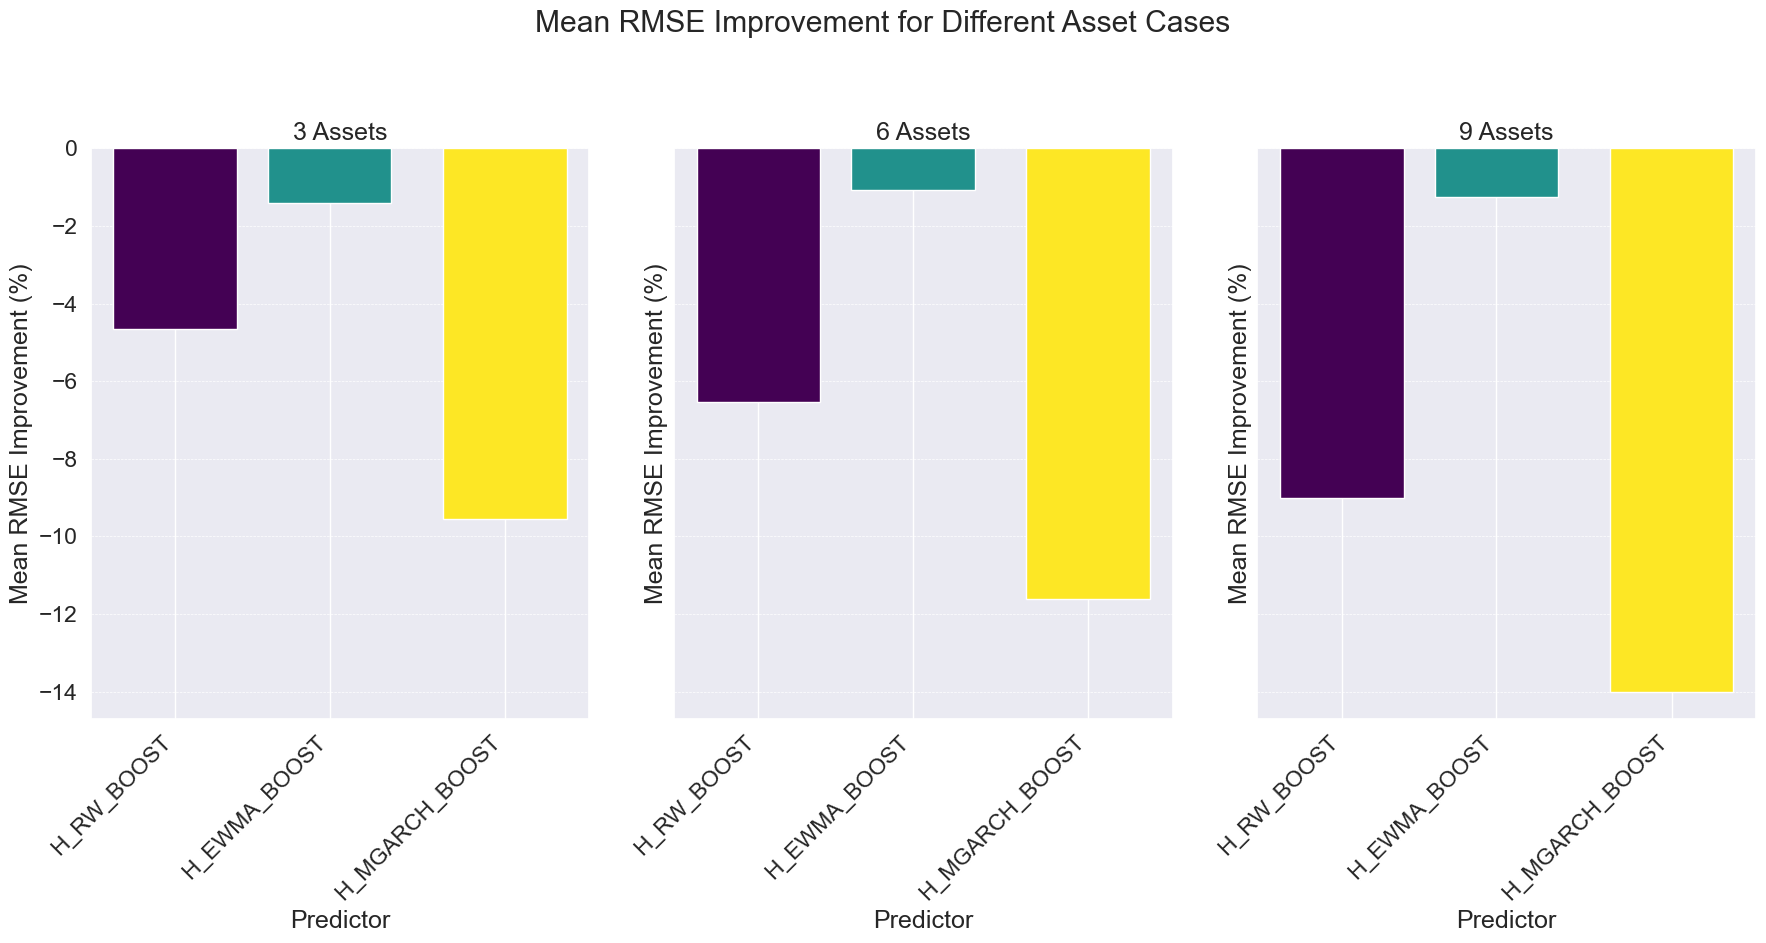

In [9]:
# now i want to plot a chart for the improvement of the hybrid predictors compared to the base predictors for the mean regret, mean loglikelihood and mean rmse

# Mean Regret Improvement
#plot_metric_with_styles_and_colors(mean_regret_improvement, 'Mean Regret Improvement for Hybrid Predictors', 'Mean Regret Improvement (%)')

# Mean Loglikelihood Improvement
#plot_metric_with_styles_and_colors(mean_loglikelihood_improvement, 'Mean Loglikelihood Improvement for Hybrid Predictors', 'Mean Loglikelihood Improvement (%)')

# Mean RMSE Improvement
#plot_metric_with_styles_and_colors(mean_rmse_improvement, 'Mean RMSE Improvement for Hybrid Predictors', 'Mean RMSE Improvement (%)')

# Creating figure and axes for plotting  mean Loglikelihood improvement
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean Loglikelihood Improvement for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_loglikelihood_improvement, '3 Assets', 'Mean Loglikelihood Improvement (%)', axs[0], 0)
plot_histogram(mean_loglikelihood_improvement, '6 Assets', 'Mean Loglikelihood Improvement (%)', axs[1], 1)
plot_histogram(mean_loglikelihood_improvement, '9 Assets', 'Mean Loglikelihood Improvement (%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting  mean Regret improvement
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean Regret Improvement for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_regret_improvement, '3 Assets', 'Mean Regret Improvement (%)', axs[0], 0)
plot_histogram(mean_regret_improvement, '6 Assets', 'Mean Regret Improvement (%)', axs[1], 1)
plot_histogram(mean_regret_improvement, '9 Assets', 'Mean Regret Improvement (%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting  mean RMSE improvement
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE Improvement for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse_improvement, '3 Assets', 'Mean RMSE Improvement (%)', axs[0], 0)
plot_histogram(mean_rmse_improvement, '6 Assets', 'Mean RMSE Improvement (%)', axs[1], 1)
plot_histogram(mean_rmse_improvement, '9 Assets', 'Mean RMSE Improvement (%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# FINAL PLOT WITH ALL THE PREDICTOR IN THE SAME CHART(VOLATILITY)

In [10]:
def plot_prices_volatilities_for_all_predictors(stockPercentageChangeReturn, real_volatility, real_volatility_startDate, real_volatility_endDate, all_predictors_volatilities, asset_name):
    '''
    Function to plot prices and volatilities of all predictors
    '''
    # Convert start and end dates to datetime
    real_volatility_startDate = pd.to_datetime(real_volatility_startDate)
    real_volatility_endDate = pd.to_datetime(real_volatility_endDate)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 11), sharex=True)

    # Convert the asset name from the actual name to the PERMCO code
    asset_codes = {"AAPL": 7, "IBM": 20990, "MCD": 21177}
    asset_code = asset_codes.get(asset_name, asset_name)

    # Plot stock prices
    if asset_code in stockPercentageChangeReturn.columns:
        ax1.plot(stockPercentageChangeReturn.index, stockPercentageChangeReturn[asset_code], label=f'{asset_name} Price', color='green')
    ax1.set_title(f'{asset_name} Stock Prices')
    ax1.set_ylabel('Price (dollars)')
    ax1.legend(loc='upper left')

    # Filter the DataFrame for the desired date range
    filtered_volatility = all_predictors_volatilities.loc[real_volatility_startDate:real_volatility_endDate]

    # Plot each predictor's volatility, including real volatility
    for predictor in filtered_volatility.columns:
        color = 'blue' if predictor == 'PRESCIENT' else None  # Make PRESCIENT blue, others default color
        ax2.plot(filtered_volatility.index, filtered_volatility[predictor], label=f'{predictor} Volatility', linestyle='-', color=color)
    
    ax2.set_title(f'{asset_name} Volatility: Real vs. Predictors')
    ax2.set_xlabel('Time (days)')
    ax2.set_ylabel('Volatility (%)')
    ax2.legend(loc='upper left')

    # Set x-axis limits to match the start and end dates
    ax1.set_xlim(left=real_volatility_startDate, right=real_volatility_endDate)
    ax2.set_xlim(left=real_volatility_startDate, right=real_volatility_endDate)

    # Adding vertical lines for specific events
    for ax in [ax1, ax2]:
        ax.axvline(pd.Timestamp('2020-02-24'), color='gray', linestyle='--', lw=2, label='COVID start')  # COVID start
        ax.axvline(pd.Timestamp('2022-02-24'), color='red', linestyle='--', lw=2, label='Ukraine War start')  # Ukraine War start

    plt.tight_layout()
    plt.show() 



def plot_prices_volatilities_with_shaded_area(stockPercentageChangeReturn, real_volatility, real_volatility_startDate, real_volatility_endDate, all_predictors_volatilities, asset_name, predictor_name):
    '''
    Function to plot prices and volatilities of all predictors with a shaded area,
    always including the PRESCIENT volatility for comparison.
    '''
     # Convert start and end dates to datetime
    real_volatility_startDate = pd.to_datetime(real_volatility_startDate)
    real_volatility_endDate = pd.to_datetime(real_volatility_endDate)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 11), sharex=True)

    # Convert the asset name from the actual name to the PERMCO code
    asset_codes = {"AAPL": 7, "IBM": 20990, "MCD": 21177}
    asset_code = asset_codes.get(asset_name, asset_name)

    # Plot stock prices
    if asset_code in stockPercentageChangeReturn.columns:
        ax1.plot(stockPercentageChangeReturn.index, stockPercentageChangeReturn[asset_code], label=f'{asset_name} Price', color='orange')
    ax1.set_title(f'{asset_name} Stock Prices')
    ax1.set_ylabel('Price (dollars)')
    ax1.legend(loc='upper left')

    # Filter the DataFrame for the desired date range
    filtered_volatility = all_predictors_volatilities.loc[real_volatility_startDate:real_volatility_endDate]

    # Calculate the min and max across all predictors for the shaded area
    min_volatility = filtered_volatility.min(axis=1)
    max_volatility = filtered_volatility.max(axis=1)

    # Shaded area between min and max
    ax2.fill_between(filtered_volatility.index, min_volatility, max_volatility, color='gray', alpha=0.2)

    # Plot the PRESCIENT volatility
    ax2.plot(filtered_volatility.index, filtered_volatility['PRESCIENT'], label='PRESCIENT Volatility', color='blue', linestyle='-')

    # Plot the selected predictor's volatility
    ax2.plot(filtered_volatility.index, filtered_volatility[predictor_name], label=f'{predictor_name} Volatility', linestyle='-', color='red')

    # Plot the hybrid version of the selected predictor, if it exists
    hybrid_name = f'H_{predictor_name}'
    if hybrid_name in filtered_volatility.columns:
        ax2.plot(filtered_volatility.index, filtered_volatility[hybrid_name], label=f'{hybrid_name} Volatility', linestyle='-', color='green')
    
    ax2.set_title(f'{asset_name} Volatility: Comparing {predictor_name}, its Hybrid, and PRESCIENT')
    ax2.set_xlabel('Time (days)')
    ax2.set_ylabel('Volatility (%)')
    ax2.legend(loc='upper left')

    # Set x-axis limits to match the start and end dates
    ax1.set_xlim(left=real_volatility_startDate, right=real_volatility_endDate)
    ax2.set_xlim(left=real_volatility_startDate, right=real_volatility_endDate)

    # Adding vertical lines for specific events
    for ax in [ax1, ax2]:
        ax.axvline(pd.Timestamp('2020-02-24'), color='gray', linestyle='--', lw=2, label='COVID start')  # COVID start
        ax.axvline(pd.Timestamp('2022-02-24'), color='purple', linestyle='--', lw=2, label='Ukraine War start')  # Ukraine War start

    plt.tight_layout()
    plt.show()

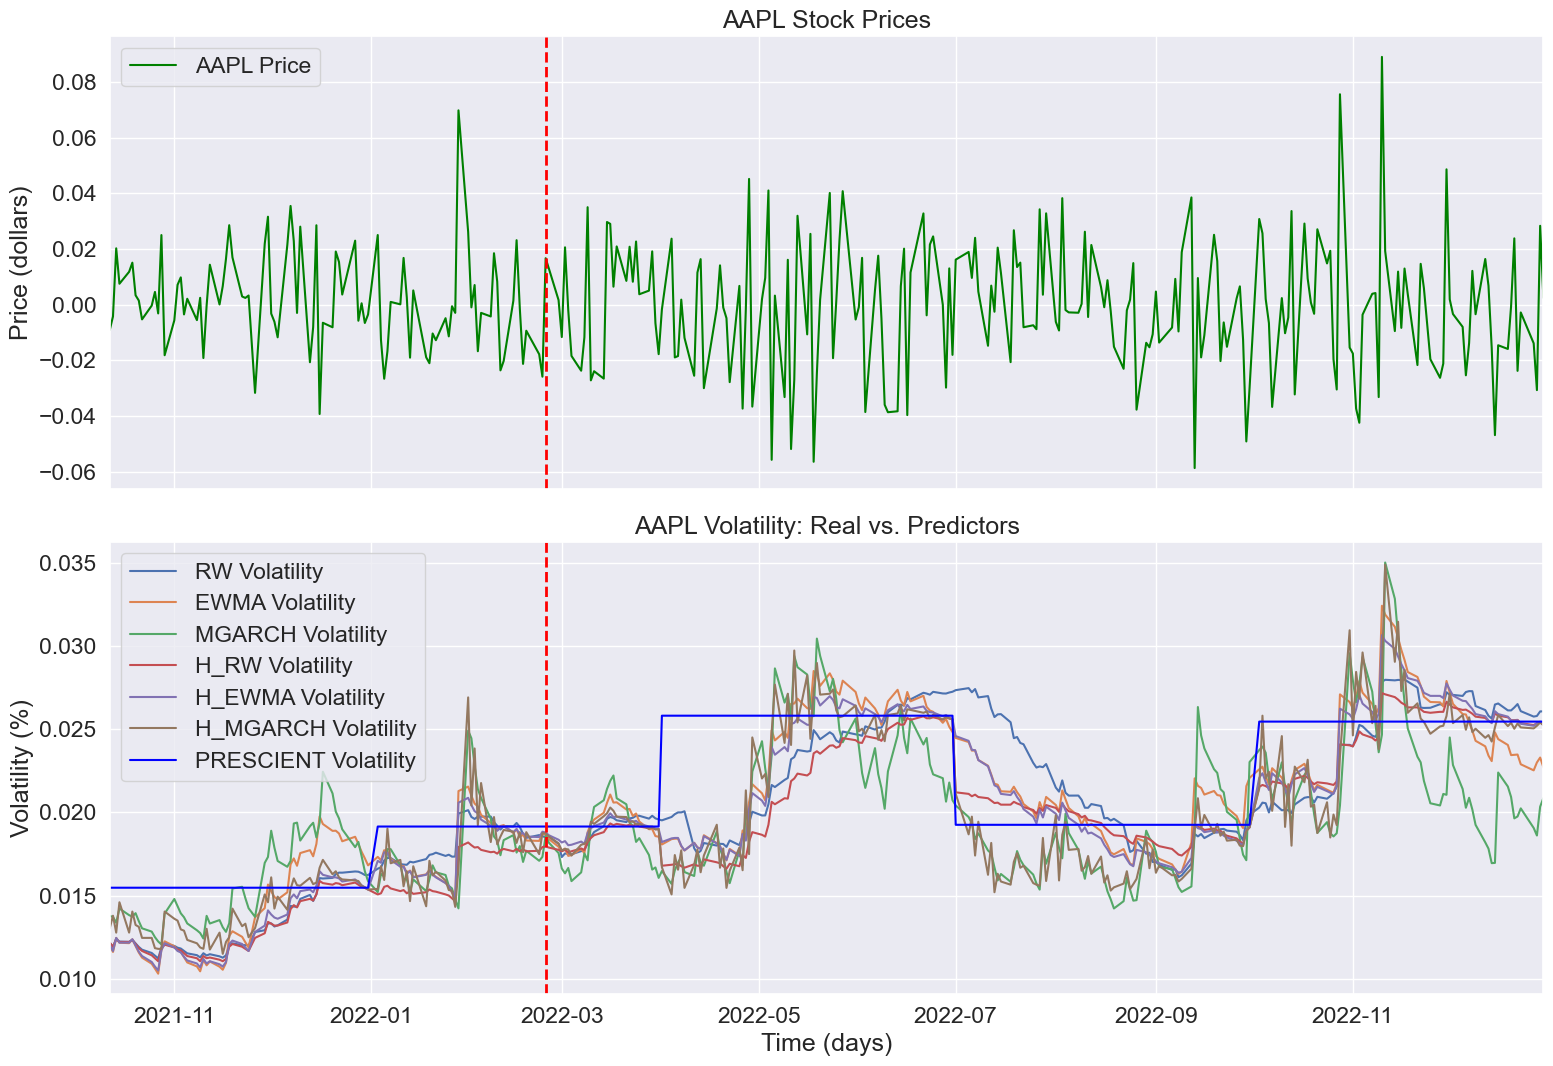

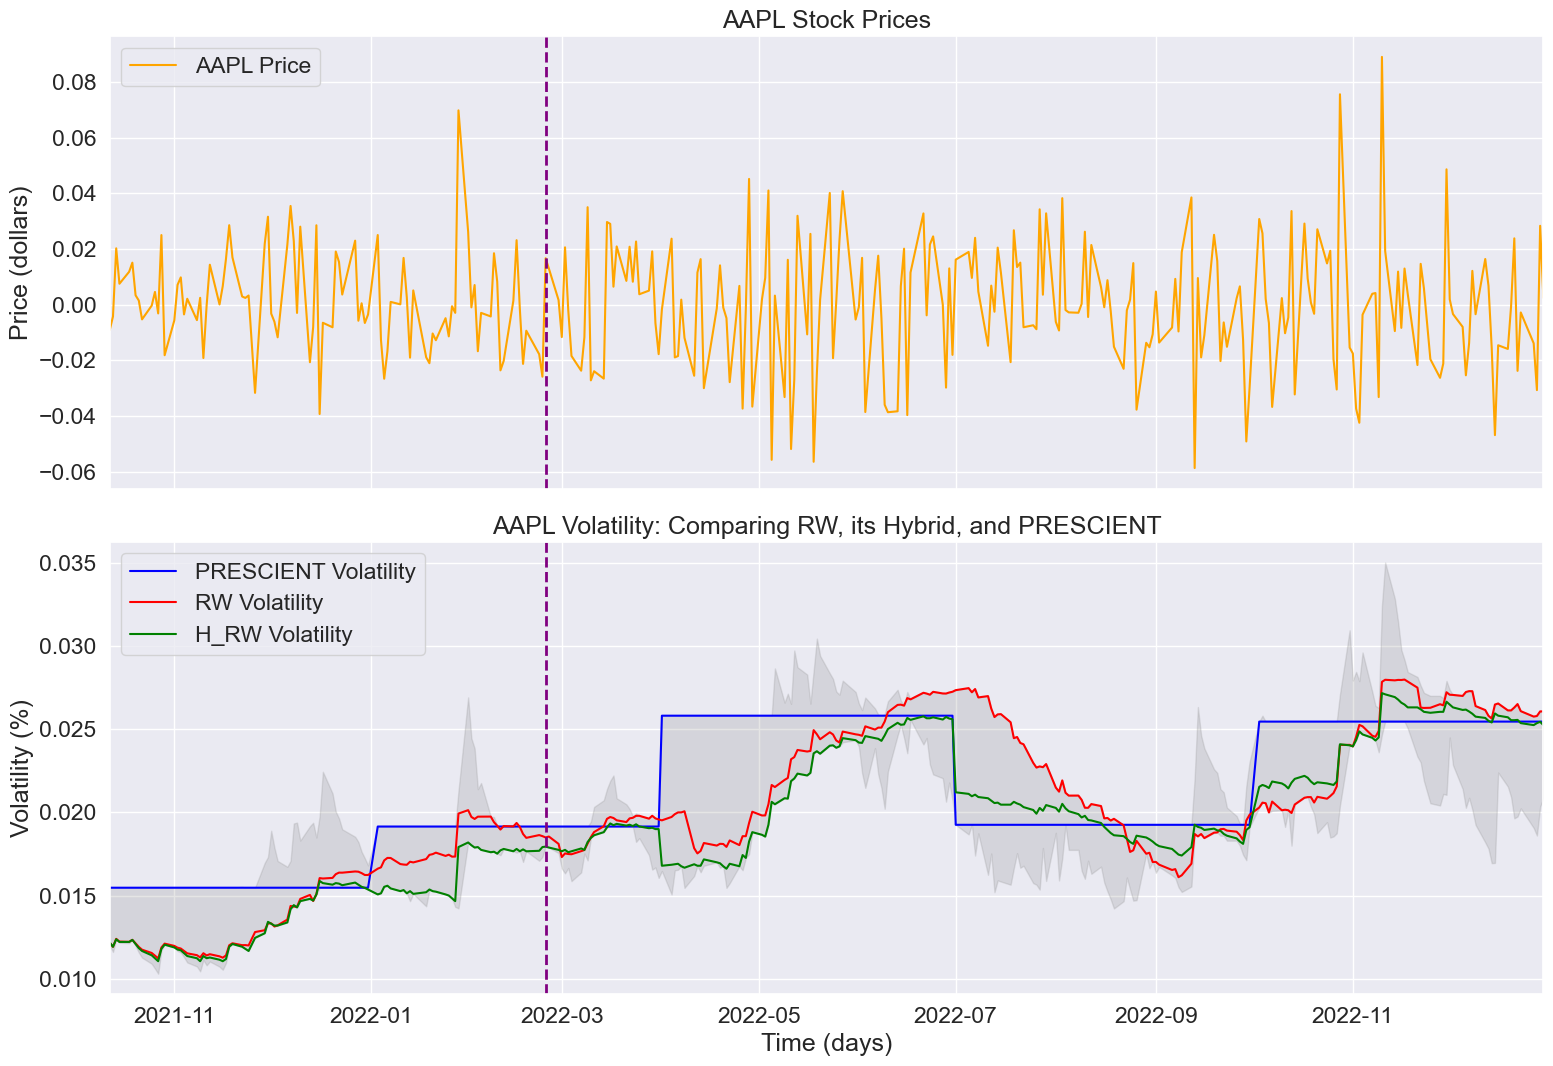

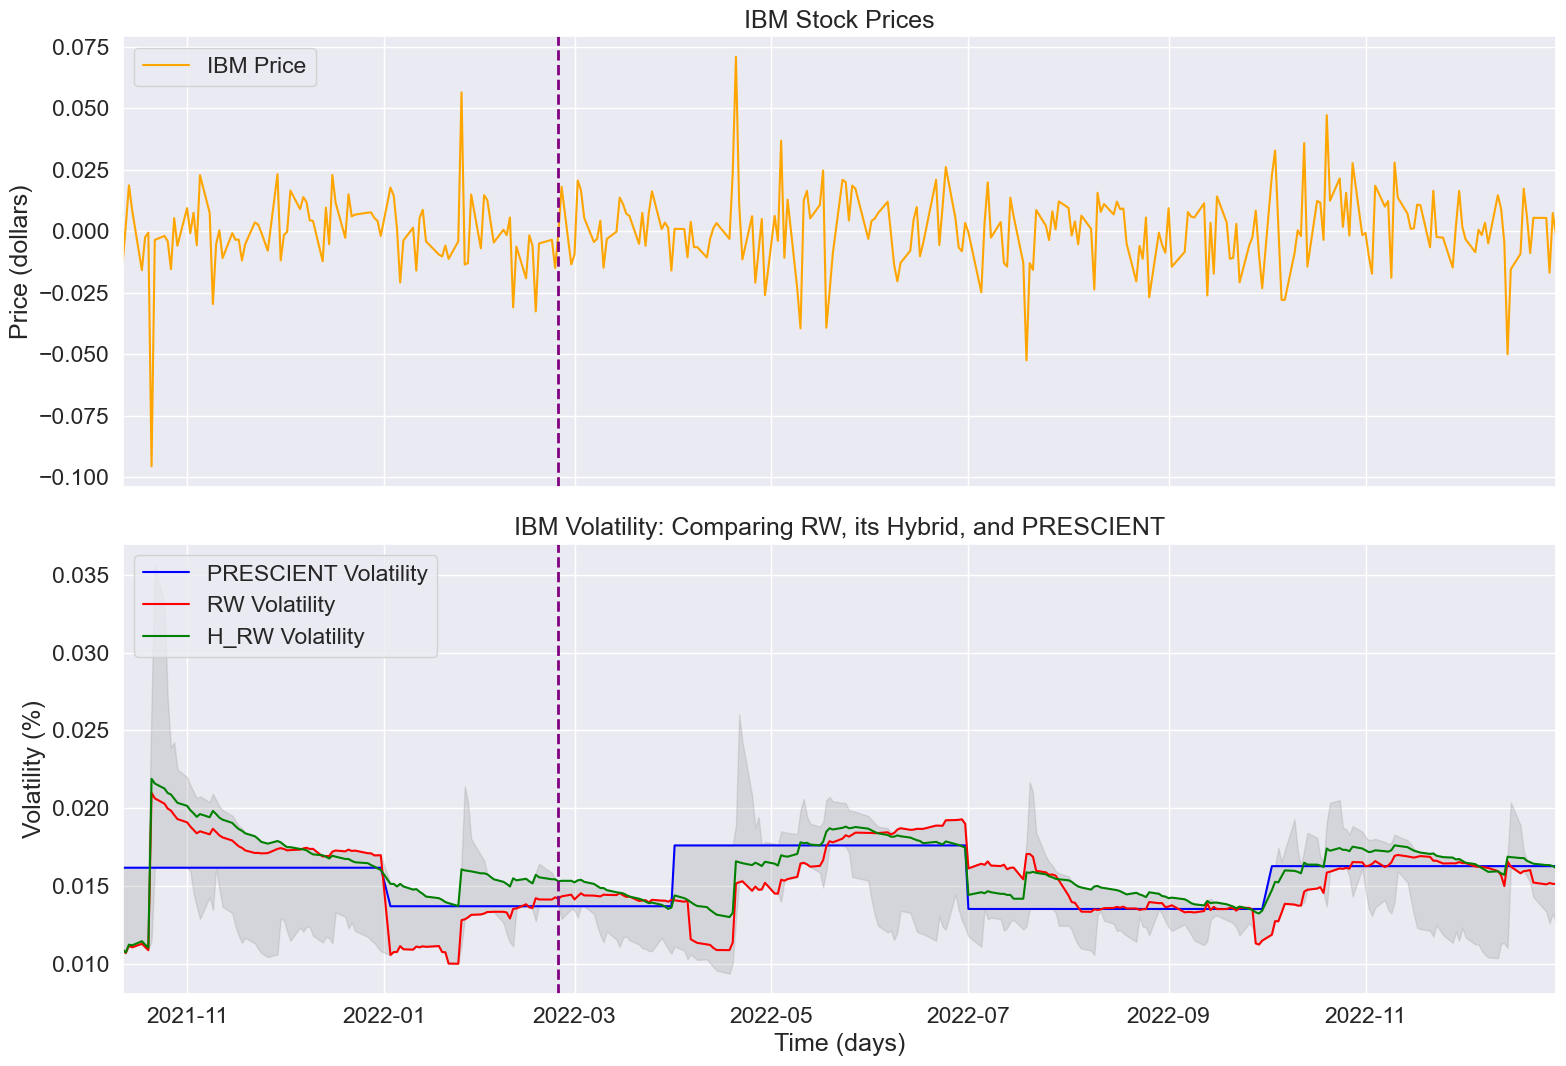

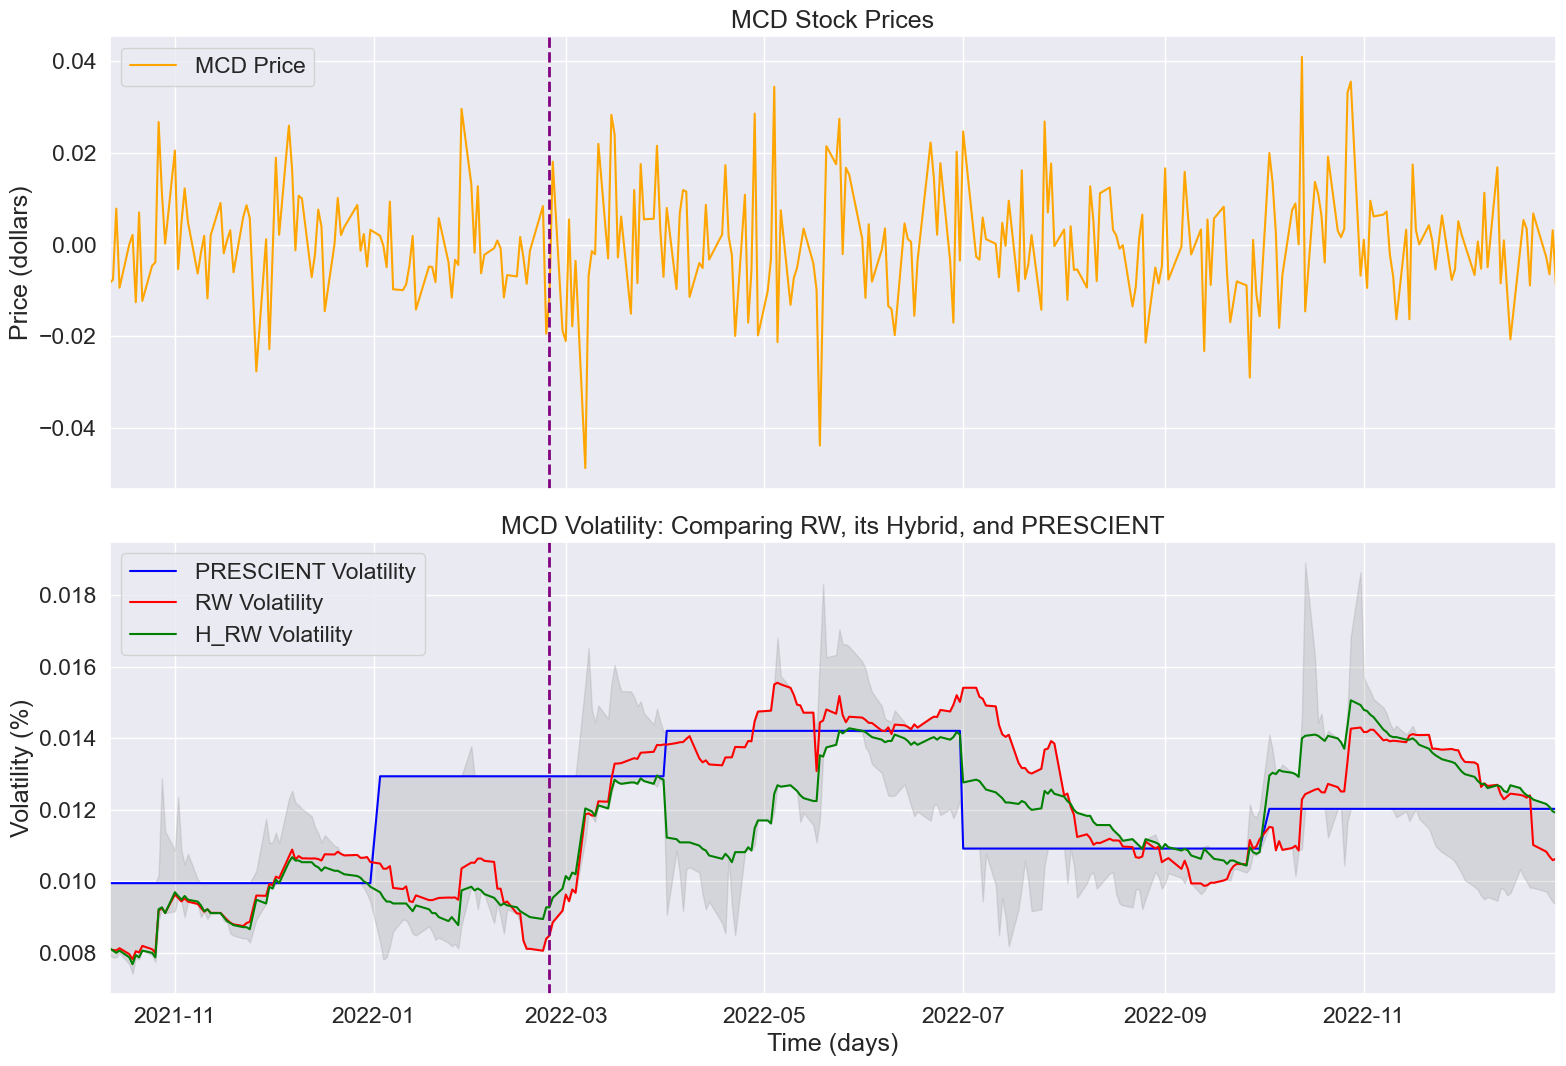

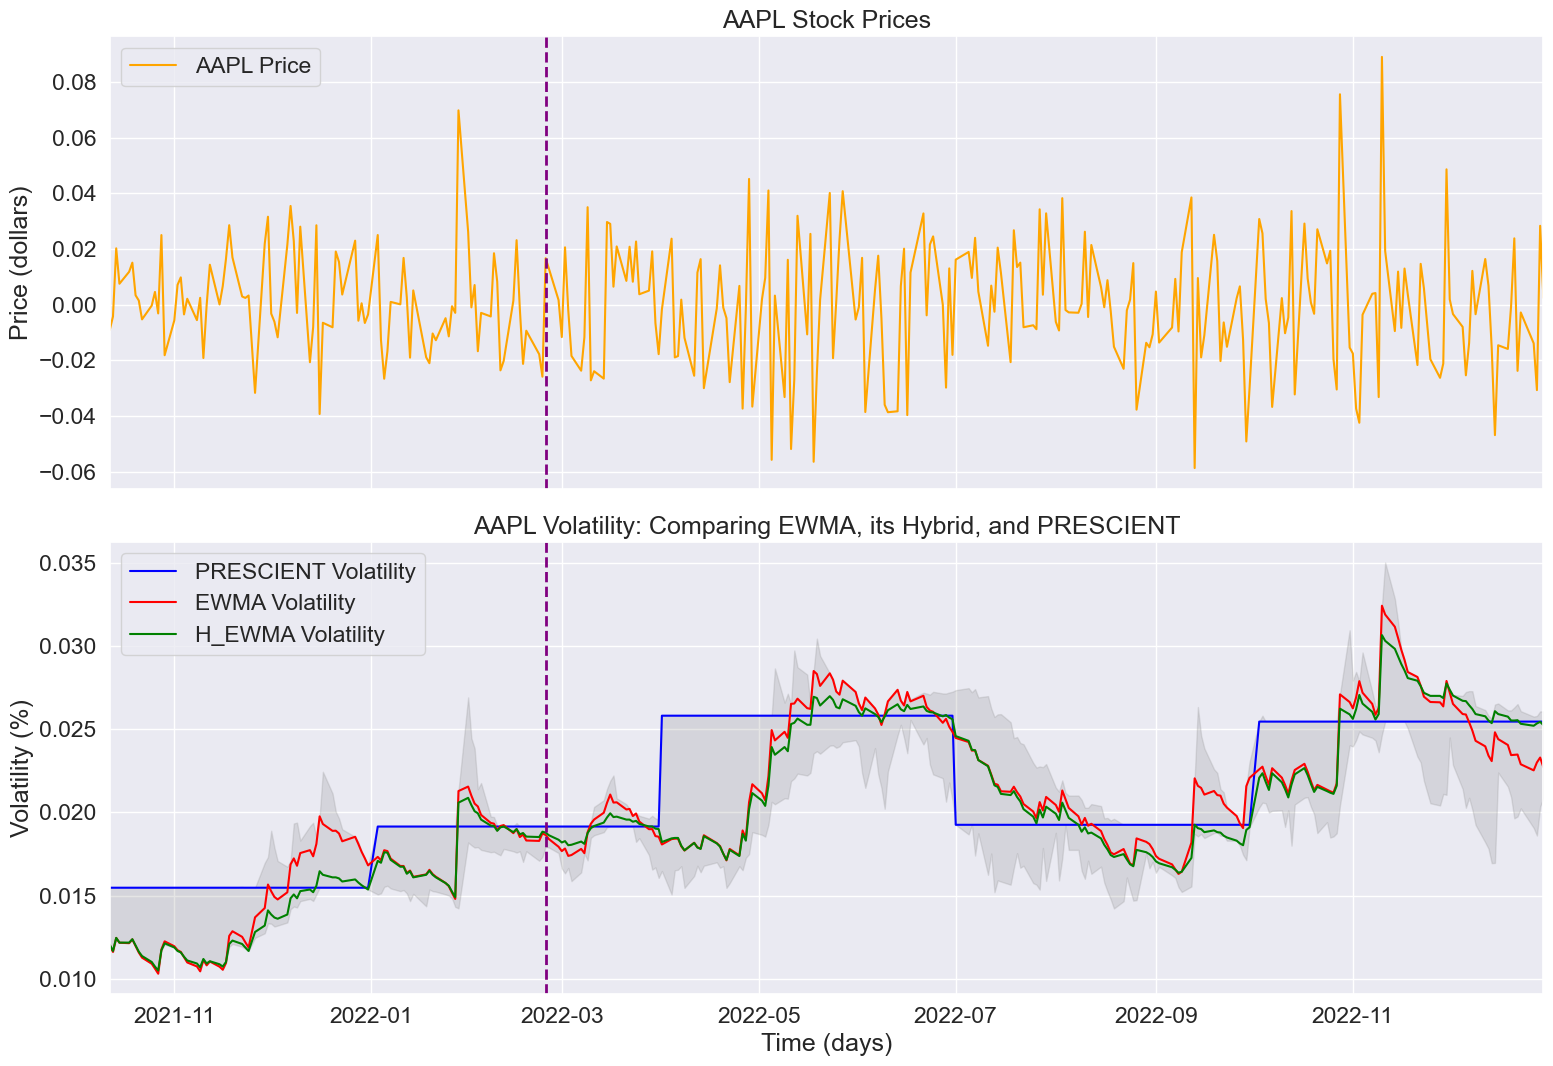

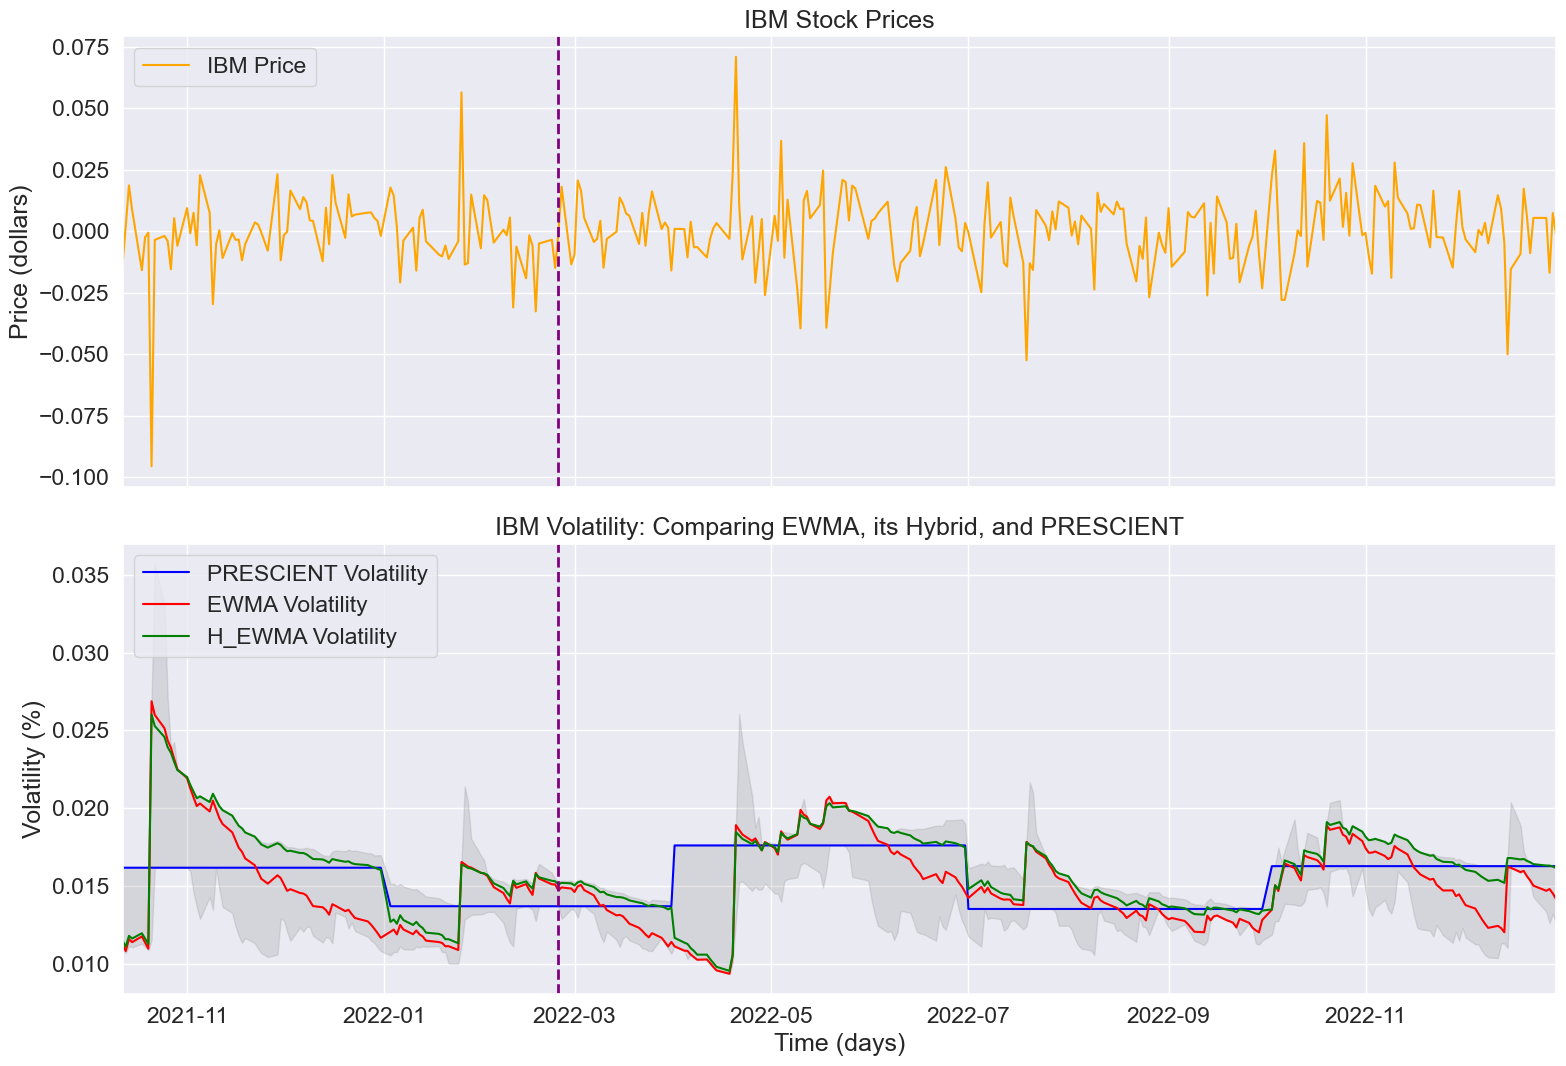

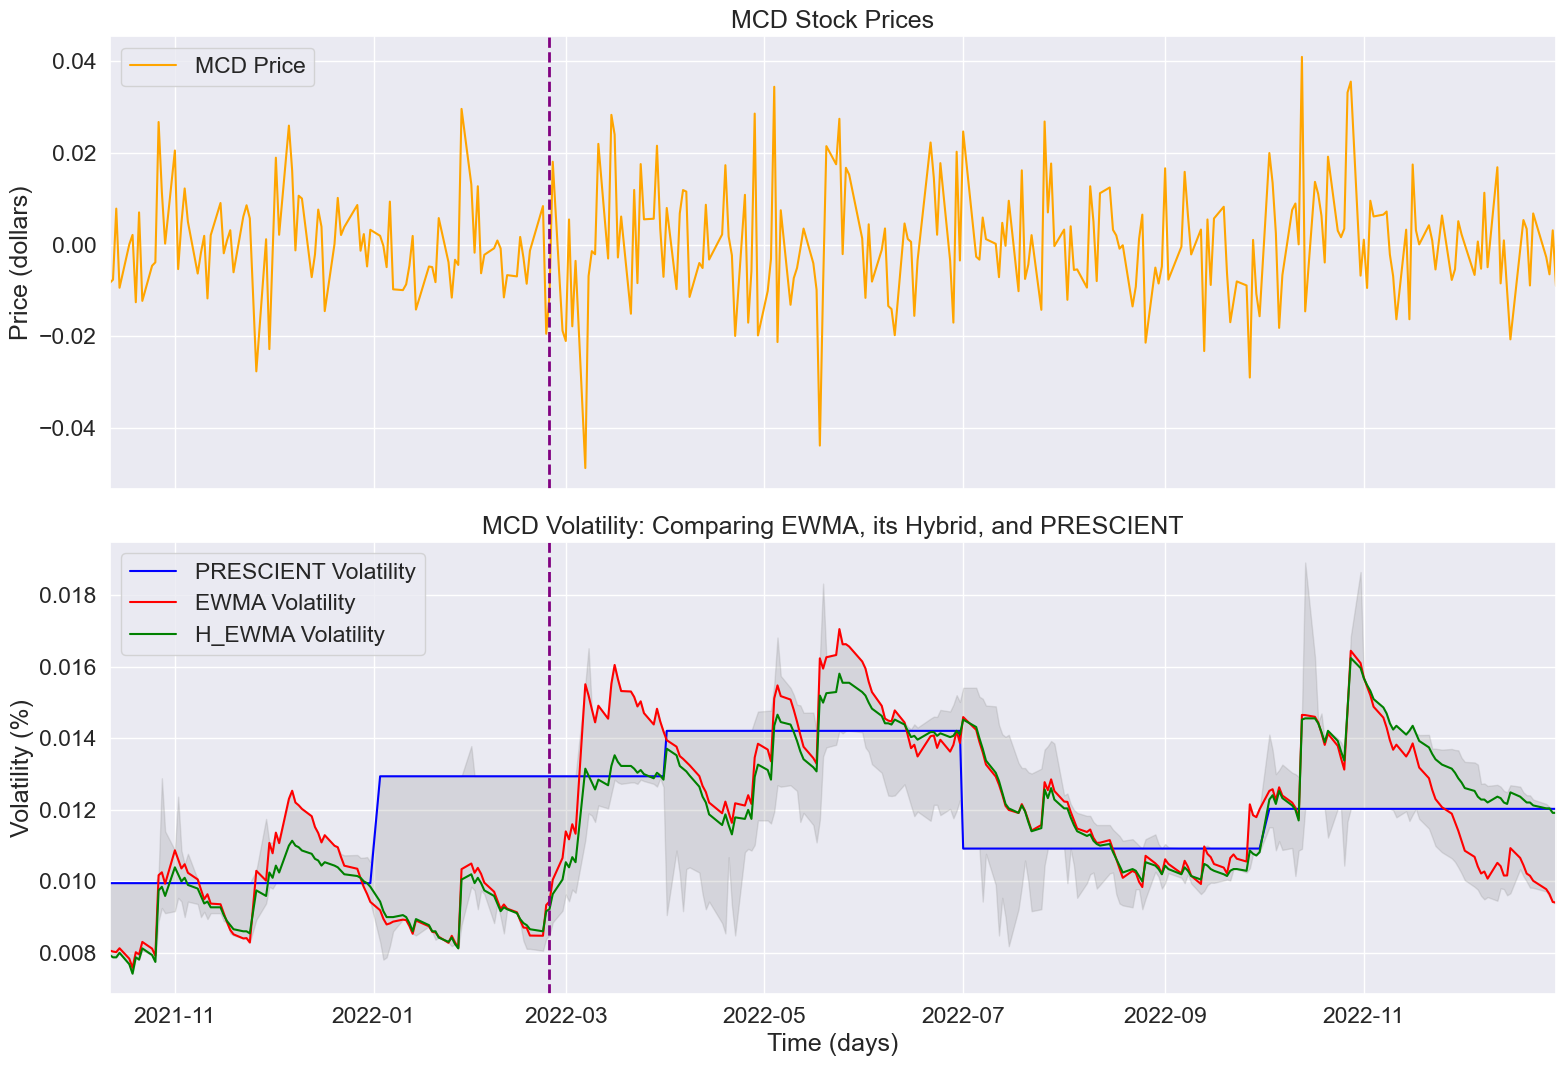

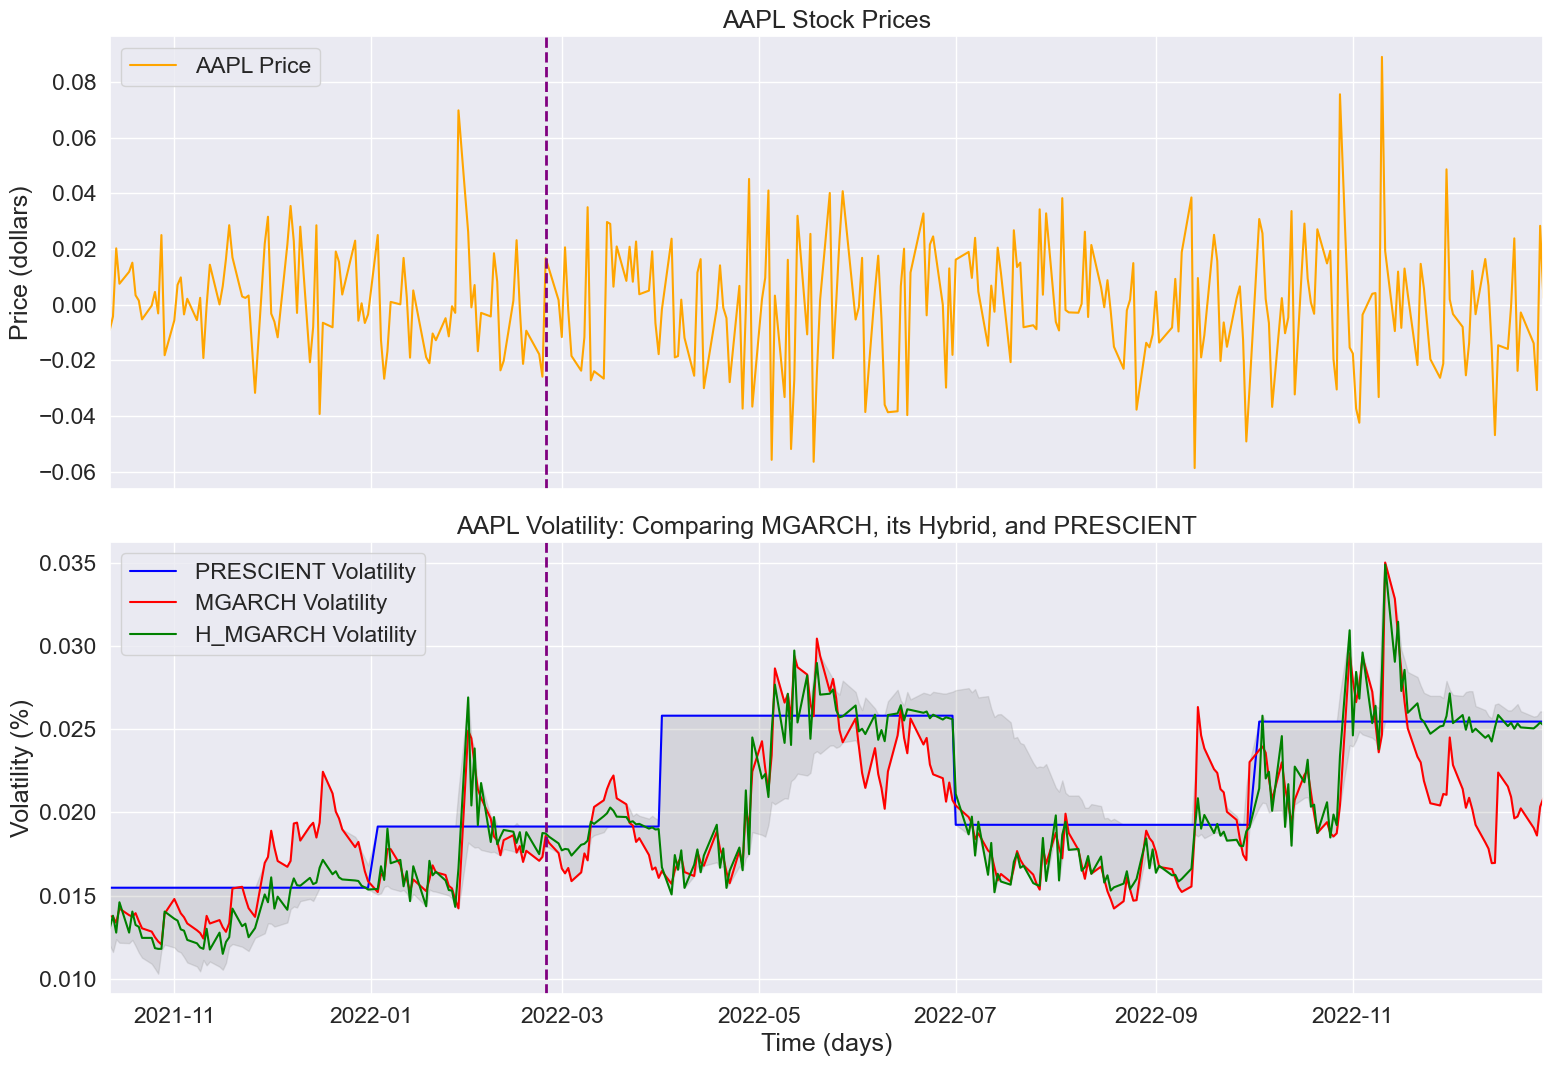

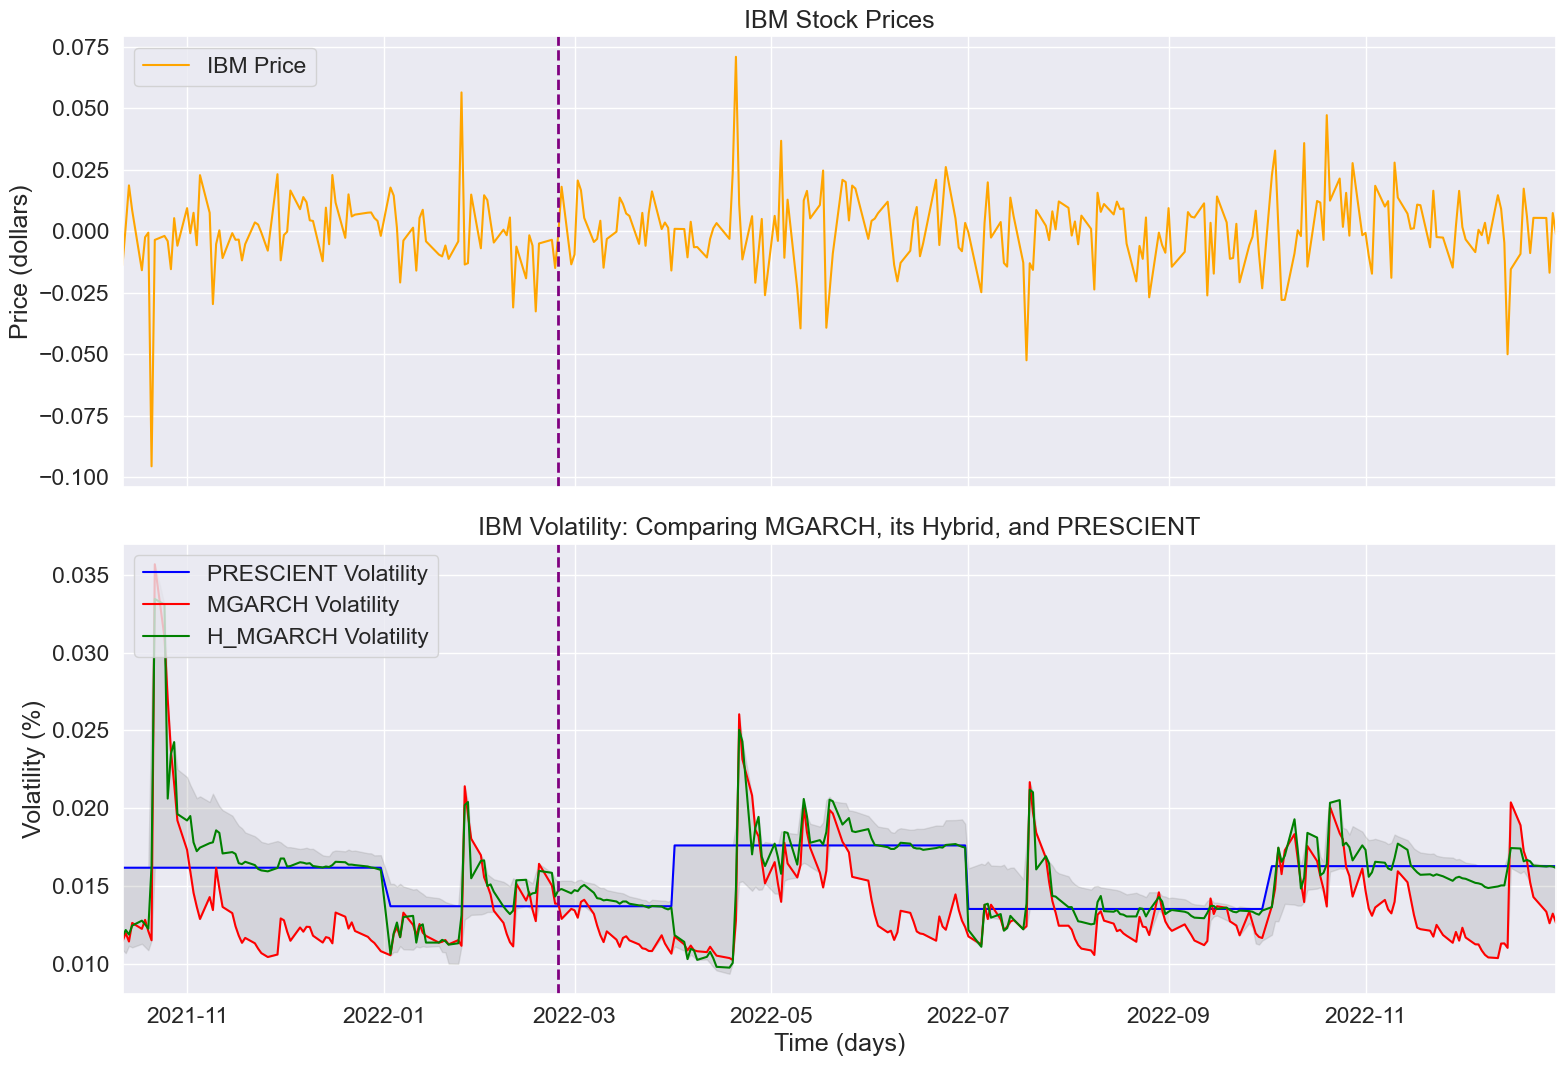

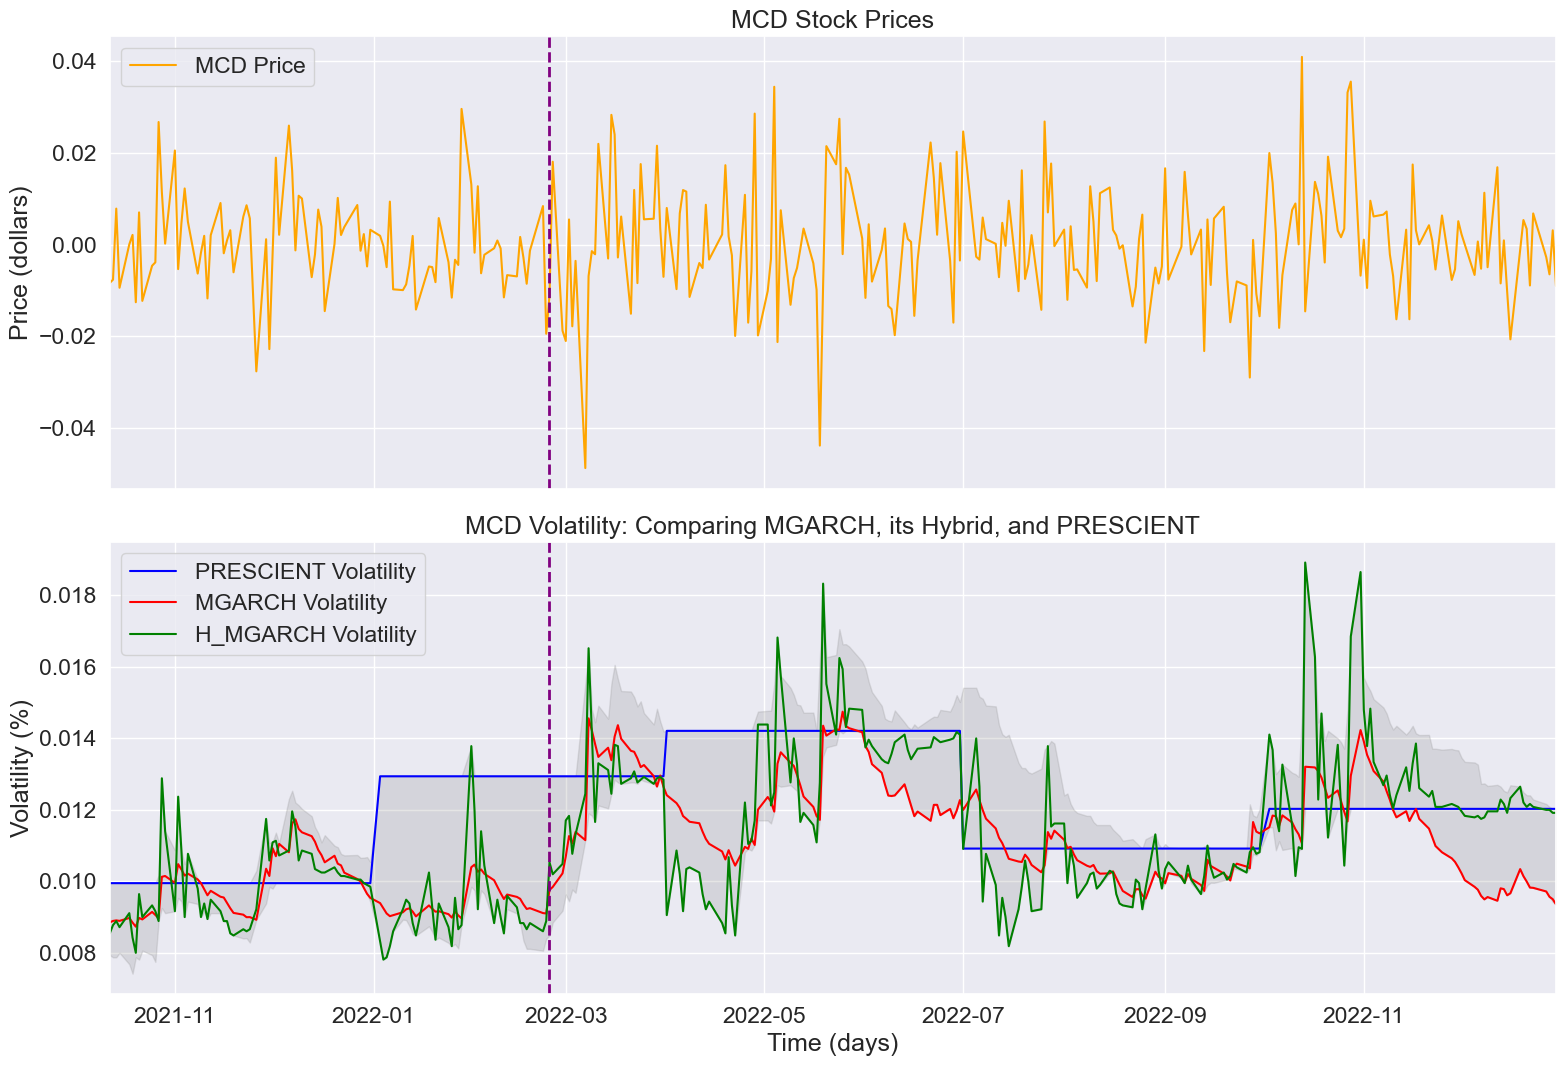

In [11]:
# here i save every volatility of the predfictors in a dictionary
predictorsVolatilityAAPL = {
    'RW': rw_volatilities["AAPL"],
    'EWMA': ewma_volatilities["AAPL"],
    'MGARCH': mgarch_volatilities["AAPL"],
    'H_RW': hybrid_rw_volatilities["AAPL"],
    'H_EWMA': hybrid_ewma_volatilities["AAPL"],
    'H_MGARCH': hybrid_mgarch_volatilities["AAPL"],
    'PRESCIENT': real_volatilities["AAPL"]
}

predictorsVolatilityIBM = {
    'RW': rw_volatilities["IBM"],
    'EWMA': ewma_volatilities["IBM"],
    'MGARCH': mgarch_volatilities["IBM"],
    'H_RW': hybrid_rw_volatilities["IBM"],
    'H_EWMA': hybrid_ewma_volatilities["IBM"],
    'H_MGARCH': hybrid_mgarch_volatilities["IBM"],
    'PRESCIENT': real_volatilities["IBM"]
}

predictorsVolatilityMCD = {
    'RW': rw_volatilities["MCD"],
    'EWMA': ewma_volatilities["MCD"],
    'MGARCH': mgarch_volatilities["MCD"],
    'H_RW': hybrid_rw_volatilities["MCD"],
    'H_EWMA': hybrid_ewma_volatilities["MCD"],
    'H_MGARCH': hybrid_mgarch_volatilities["MCD"],
    'PRESCIENT': real_volatilities["MCD"]
}

# convert every dictionary to a dataframe
df_predictorsVolatilityAAPL = pd.DataFrame(predictorsVolatilityAAPL)
df_predictorsVolatilityIBM = pd.DataFrame(predictorsVolatilityIBM)
df_predictorsVolatilityMCD = pd.DataFrame(predictorsVolatilityMCD)

# plot the prices and volatilities for all the predictors
plot_prices_volatilities_for_all_predictors(testDataWithPercentageChange, df_predictorsVolatilityAAPL["PRESCIENT"], start_date, end_date, df_predictorsVolatilityAAPL, 'AAPL')
# plot the prices and volatilities for all the predictors
#plot_prices_volatilities_for_all_predictors(testDataWithPercentageChange, df_predictorsVolatilityIBM["PRESCIENT"], start_date, end_date, df_predictorsVolatilityIBM, 'IBM')
# plot the prices and volatilities for all the predictors
#plot_prices_volatilities_for_all_predictors(testDataWithPercentageChange, df_predictorsVolatilityMCD["PRESCIENT"], start_date, end_date, df_predictorsVolatilityMCD, 'MCD')

predictorList = ['RW', 'EWMA', 'MGARCH']

for predictor in predictorList:
    # RW AND H_RW CHARTS
    plot_prices_volatilities_with_shaded_area(testDataWithPercentageChange, df_predictorsVolatilityAAPL["PRESCIENT"], start_date, end_date, df_predictorsVolatilityAAPL, 'AAPL', predictor)
    plot_prices_volatilities_with_shaded_area(testDataWithPercentageChange, df_predictorsVolatilityIBM["PRESCIENT"], start_date, end_date, df_predictorsVolatilityIBM, 'IBM', predictor)
    plot_prices_volatilities_with_shaded_area(testDataWithPercentageChange, df_predictorsVolatilityMCD["PRESCIENT"], start_date, end_date, df_predictorsVolatilityMCD, 'MCD', predictor)